In [1]:
from pyspark.sql import SparkSession
spark = SparkSession
spark = SparkSession.builder.appName('project_test3').getOrCreate()

In [2]:
def day_month(m):
    if m in [1,3,5,7,8,10,12]:
        day = 31
    elif m == 2:
        day = 28
    else:
        day = 30
    return day

day_month(12)

year = '2021'
month = ('1','2','3','4','5','6','7','8','9','10', '11', '12')
day = lambda m: [x+1 for x in range(day_month(m))]

hour = ('05', '17')
file_names = [f'/data/ProjectDatasetFacebook/FBads-US-{year}{m}{d:02d}-{h}_00_01' for m in month for d in day(m) for h in hour]

In [140]:
for file in file_names:
    if path_exists(file) == False:
        file_names.remove(file)
        print(file)

/data/ProjectDatasetFacebook/FBads-US-2021121-17_00_01
/data/ProjectDatasetFacebook/FBads-US-2021130-17_00_01
/data/ProjectDatasetFacebook/FBads-US-2021201-17_00_01
/data/ProjectDatasetFacebook/FBads-US-2021205-05_00_01
/data/ProjectDatasetFacebook/FBads-US-2021209-05_00_01
/data/ProjectDatasetFacebook/FBads-US-2021214-05_00_01
/data/ProjectDatasetFacebook/FBads-US-2021216-17_00_01
/data/ProjectDatasetFacebook/FBads-US-2021226-05_00_01
/data/ProjectDatasetFacebook/FBads-US-2021229-05_00_01
/data/ProjectDatasetFacebook/FBads-US-2021230-05_00_01
/data/ProjectDatasetFacebook/FBads-US-2021518-05_00_01
/data/ProjectDatasetFacebook/FBads-US-2021603-17_00_01
/data/ProjectDatasetFacebook/FBads-US-2021625-17_00_01
/data/ProjectDatasetFacebook/FBads-US-2021708-17_00_01
/data/ProjectDatasetFacebook/FBads-US-2021715-17_00_01
/data/ProjectDatasetFacebook/FBads-US-2021724-05_00_01
/data/ProjectDatasetFacebook/FBads-US-2021725-17_00_01
/data/ProjectDatasetFacebook/FBads-US-2021804-05_00_01
/data/Proj

In [3]:
def path_exists(path):
    # spark is a SparkSession
    sc = spark.sparkContext
    fs = sc._jvm.org.apache.hadoop.fs.FileSystem.get(
        sc._jvm.java.net.URI.create(path),
        sc._jsc.hadoopConfiguration(),
    )
    return fs.exists(sc._jvm.org.apache.hadoop.fs.Path(path))

In [39]:
for file in file_names:
    if path_exists(file) == False:
        file_names.remove(file)

df=spark.read.json(file_names)
df

2022-05-22 16:11:58,122 WARN cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 528 for reason Container marked as failed: container_1652753568617_1728_01_000597 on host: ip-100-64-74-141.ap-southeast-2.compute.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
2022-05-22 16:11:58,122 WARN cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 526 for reason Container marked as failed: container_1652753568617_1728_01_000595 on host: ip-100-64-74-141.ap-southeast-2.compute.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
2022-05-22 16:11:58,123 ERROR cluster.YarnScheduler: Lost executor 528 on ip-100-64-74-141.ap-southeast-2.compute.internal: Container marked as failed: container_1652753568617_1728_01_000597 on host: ip-100-64-74-141.ap-southeast-2.compute.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
2022-05-22 16:11:58,125 E

DataFrame[ad_creation_time: string, ad_creative_body: string, ad_creative_link_caption: string, ad_creative_link_description: string, ad_creative_link_title: string, ad_delivery_start_time: string, ad_delivery_stop_time: string, ad_snapshot_url: string, currency: string, demographic_distribution: array<struct<age:string,gender:string,percentage:string>>, funding_entity: string, id: string, impressions: struct<lower_bound:string,upper_bound:string>, page_id: string, page_name: string, region_distribution: array<struct<percentage:string,region:string>>, spend: struct<lower_bound:string,upper_bound:string>]

In [41]:
df_caption = df.groupby("ad_creative_link_caption").count().orderBy("count", ascending=False)
df_caption.show(truncate=False)

+--------------------------------------+-------+
|ad_creative_link_caption              |count  |
+--------------------------------------+-------+
|secure.actblue.com                    |3378263|
|null                                  |3185105|
|fb.me                                 |1473974|
|facebook.com                          |1161745|
|secure.winred.com                     |395407 |
|p2a.co                                |379224 |
|democrats.org                         |304071 |
|secure.ngpvan.com                     |267692 |
|aclu.org                              |260462 |
|about.fb.com/regulations              |246830 |
|fb.com                                |236891 |
|NRDCActionFund.org/Act-Now            |227285 |
|www.newsbreakapp.com                  |216502 |
|americansforprosperity.ivolunteers.com|201114 |
|andersonadvocates.com                 |170550 |
|energyforprogress.org                 |165563 |
|takeaction.doctorswithoutborders.org  |157315 |
|action.aclu.org    

In [51]:
df_caption_rb = df.where('ad_creative_link_caption = "secure.actblue.com" or ad_creative_link_caption = "secure.winred.com"')
df_caption_rb.show(truncate=False)
df_caption_rb.groupby("ad_creative_link_caption").count().orderBy("count", ascending=False).show()

+----------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------+---------------------------------------------------------------------------------------------------------------------------+----------------------+----------------------+---------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----

2022-05-23 14:09:53,521 ERROR cluster.YarnScheduler: Lost executor 750 on ip-100-64-74-150.ap-southeast-2.compute.internal: Container marked as failed: container_1652753568617_1728_01_000825 on host: ip-100-64-74-150.ap-southeast-2.compute.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
2022-05-23 14:09:53,523 WARN cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 750 for reason Container marked as failed: container_1652753568617_1728_01_000825 on host: ip-100-64-74-150.ap-southeast-2.compute.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
2022-05-23 14:12:14,696 WARN cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 822 for reason Container marked as failed: container_1652753568617_1728_01_000897 on host: ip-100-64-74-206.ap-southeast-2.compute.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
2022-05-23 14:12:14,696 W

+------------------------+-------+
|ad_creative_link_caption|  count|
+------------------------+-------+
|      secure.actblue.com|3378263|
|       secure.winred.com| 395407|
+------------------------+-------+



In [ ]:
df_title = df.select('ad_creative_link_title').dropna()
df_title_1 = df_title.groupby("ad_creative_link_title").count().orderBy("count", ascending=False).limit(20)
df_title_1.show(truncate=False)

In [ ]:
df.createOrReplaceTempView("table_ad")
df_ad_BT = spark.sql('select * from table_ad where ad_creative_body like "%Biden%" or ad_creative_body like "%Trump%"')
#df_ad_BT.show()
df_ad_BT.createOrReplaceTempView("table_ad_BT")
spark.sql('select count(*) from table_ad').show()
#spark.sql('select count(*) from table_ad_BT').show()

In [ ]:
spark.sql('select count(*) from table_ad_BT').show()

In [5]:
file_names_1 = [f'/data/ProjectDatasetFacebook/FBads-US-{year}1{d:02d}-{h}_00_01' for d in day(1) for h in hour]
file_names_2 = [f'/data/ProjectDatasetFacebook/FBads-US-{year}2{d:02d}-{h}_00_01' for d in day(2) for h in hour]
file_names_3 = [f'/data/ProjectDatasetFacebook/FBads-US-{year}3{d:02d}-{h}_00_01' for d in day(3) for h in hour]
file_names_4 = [f'/data/ProjectDatasetFacebook/FBads-US-{year}4{d:02d}-{h}_00_01' for d in day(4) for h in hour]
file_names_5 = [f'/data/ProjectDatasetFacebook/FBads-US-{year}5{d:02d}-{h}_00_01' for d in day(5) for h in hour]
file_names_6 = [f'/data/ProjectDatasetFacebook/FBads-US-{year}6{d:02d}-{h}_00_01' for d in day(6) for h in hour]
file_names_7 = [f'/data/ProjectDatasetFacebook/FBads-US-{year}7{d:02d}-{h}_00_01' for d in day(7) for h in hour]
file_names_8 = [f'/data/ProjectDatasetFacebook/FBads-US-{year}8{d:02d}-{h}_00_01' for d in day(8) for h in hour]
file_names_9 = [f'/data/ProjectDatasetFacebook/FBads-US-{year}9{d:02d}-{h}_00_01' for d in day(9) for h in hour]
file_names_10 = [f'/data/ProjectDatasetFacebook/FBads-US-{year}10{d:02d}-{h}_00_01' for d in day(10) for h in hour]
file_names_11 = [f'/data/ProjectDatasetFacebook/FBads-US-{year}11{d:02d}-{h}_00_01' for d in day(11) for h in hour]
file_names_12 = [f'/data/ProjectDatasetFacebook/FBads-US-{year}12{d:02d}-{h}_00_01' for d in day(12) for h in hour]
file_names_months = [file_names_1,file_names_2,file_names_3,file_names_4,file_names_5,file_names_6,file_names_7,file_names_8,file_names_9,file_names_10,file_names_11,file_names_12]

In [51]:
for i, file_month in enumerate(file_names_months):
    for file in file_month:
        if path_exists(file) == False:
            file_names_months[i].remove(file)

In [7]:
df_1 =spark.read.json(file_names_1)
print("1 finish")

1 finish


In [ ]:
df_1.show(truncate=False)

In [19]:
df_1.createOrReplaceTempView('Table_1')
spark.sql('select count(*) from Table_1').show()
spark.sql('select count(*) from Table_1 group by id order by count(1) DESC').show()

+--------+
|count(1)|
+--------+
|   32407|
+--------+



+--------+
|count(1)|
+--------+
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
|      60|
+--------+
only showing top 20 rows



In [20]:
df_2 =spark.read.json(file_names_2)
print("2 finish")
df_3 =spark.read.json(file_names_3)
print("3 finish")
df_4 =spark.read.json(file_names_4)
print("4 finish")
df_5 =spark.read.json(file_names_5)
print("5 finish")
df_6 =spark.read.json(file_names_6)
print("6 finish")
df_7 =spark.read.json(file_names_7)
print("7 finish")
df_8 =spark.read.json(file_names_8)
print("8 finish")


2 finish


3 finish


4 finish


5 finish


6 finish


7 finish


8 finish


In [52]:
df_9 =spark.read.json(file_names_9)
print("9 finish")
df_10 =spark.read.json(file_names_10)
print("10 finish")
df_11 =spark.read.json(file_names_11)
print("11 finish")
df_12 =spark.read.json(file_names_12)
print("12 finish")

9 finish


10 finish


11 finish


12 finish


In [53]:
for i in range(1,13):
    globals()['df_'+str(i)].createOrReplaceTempView("table_{}".format(i))
    print('{} finsh'.format(i))

1 finsh
2 finsh
3 finsh
4 finsh
5 finsh
6 finsh
7 finsh
8 finsh
9 finsh
10 finsh
11 finsh
12 finsh


In [101]:
from pyspark.sql.functions import arrays_zip, col, explode
df_region_1 = df_1.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region"))
df_region_1 = df_region_1.select("ad_creative_link_title", "ad_creative_body", "funding_entity","region_distribution_x", explode("region_distribution").alias("t_region_distribution"))
df_region_1 = df_region_1.select("ad_creative_link_title", "ad_creative_body", "funding_entity", "t_region_distribution.percentage", "t_region_distribution.region")
df_region_1.show()

+----------------------+--------------------+--------------------+----------+--------------+
|ad_creative_link_title|    ad_creative_body|      funding_entity|percentage|        region|
+----------------------+--------------------+--------------------+----------+--------------+
|   New South Super PAC|Georgia - Tuesday...|Community Change ...|         1|       Georgia|
|  Everything you ne...|Georgia - Tuesday...|Community Change ...|         1|       Georgia|
|  Everything you ne...|Georgia - Tuesday...|Community Change ...|         1|       Georgia|
|  Everything you ne...|Georgia - Tuesday...|Community Change ...|         1|       Georgia|
|  Everything you ne...|Georgia - Tuesday...|Community Change ...|         1|       Georgia|
|   New South Super PAC|Georgia - Tuesday...|Community Change ...|         1|       Georgia|
|  Everything you ne...|Georgia - Tuesday...|Community Change ...|         1|       Georgia|
|  Why does Kelly Lo...|Why does Kelly Lo...|Robert Emmette Th...|    

In [105]:
df_region_1.createOrReplaceTempView("Table_Georgia_1")
df_region_1_Georgia = spark.sql('select ad_creative_link_title, count(ad_creative_link_title) from Table_Georgia_1 where region = "Georgia" group by ad_creative_link_title order by count(ad_creative_link_title) desc')
df_region_1_Georgia.show(truncate=False)

+---------------------------------------------------+-----------------------------+
|ad_creative_link_title                             |count(ad_creative_link_title)|
+---------------------------------------------------+-----------------------------+
|{{product.name}}                                   |1991                         |
|Patriots, Georgia NEEDS you!                       |1154                         |
|Everything you need to vote                        |1026                         |
|Be A Voter                                         |584                          |
|Get conservative news today that you can trust.    |535                          |
|News for conservatives you can trust.              |529                          |
|Vote Warnock for Senate. Election Day is January 5 |486                          |
|Chip in to help flip the U.S. Senate               |395                          |
|Vote for Ossoff and Warnock!                       |388                    

In [138]:
df_1_count = df_1.count()
title_vote = df_region_1.where('ad_creative_link_title like "%Vote%" or ad_creative_link_title like "%vote%"').count()
body_vote = df_region_1.where('ad_creative_body like "%Vote%" or ad_creative_body like "%vote%"').count()
[df_1_count, title_vote, body_vote]

[32407, 11945, 14389]

In [145]:
import pandas as pd
import numpy as np
df_count_1 = pd.DataFrame(np.array([[df_1_count, title_vote, body_vote]]), columns = ["number of January ads in Georgia", "number of titles with 'vote'", "number of bodies with 'vote'"])
df_count_1

,number of January ads in Georgia,number of titles with 'vote',number of bodies with 'vote'
0,32407,11945,14389


In [147]:
df_per_1 = pd.DataFrame(np.array([[df_1_count/df_1_count, title_vote/df_1_count, body_vote/df_1_count]]), columns = ["    % of January ads in Georgia", "    % of titles with 'vote'", "    % of bodies with 'vote'"])
df_per_1

,% of January ads in Georgia,% of titles with 'vote',% of bodies with 'vote'
0,1.0,0.368593,0.444009


In [113]:
df_title_1_Georgia = spark.sql('select funding_entity, count(funding_entity) from Table_Georgia_1 group by funding_entity order by count(funding_entity) desc')
df_title_1_Georgia.show(truncate=False)

+--------------------------------+---------------------+
|funding_entity                  |count(funding_entity)|
+--------------------------------+---------------------+
|Fight For The Base              |2491                 |
|Our Friendly Forest             |2137                 |
|Black Voters Matter Fund Inc    |1789                 |
|REPUBLICAN NATIONAL COMMITTEE   |1671                 |
|MAJORITY FORWARD                |1544                 |
|MASTV EL PLANETA LLC            |1385                 |
|WARNOCK FOR GEORGIA             |1363                 |
|Real Voices Media               |1350                 |
|WorkMoney                       |1254                 |
|BizPac Review                   |1064                 |
|JON OSSOFF FOR SENATE           |1032                 |
|Democratic Party of Georgia     |950                  |
|AB PAC                          |877                  |
|Asian American Advocacy Fund PAC|863                  |
|TED CRUZ FOR SENATE           

In [122]:
fight = spark.sql('select distinct(ad_creative_body), funding_entity from Table_Georgia_1 where funding_entity = "Fight For The Base" or funding_entity = "Our Friendly Forest" or funding_entity = "MAJORITY FORWARD"')
fight.show()

+--------------------+-------------------+
|    ad_creative_body|     funding_entity|
+--------------------+-------------------+
|Hey Georgia!  Do ...|   MAJORITY FORWARD|
|"Me and Trump Fis...|Our Friendly Forest|
|Hey Georgia! Show...|   MAJORITY FORWARD|
|Make your plan to...|   MAJORITY FORWARD|
|Haga un plan para...|   MAJORITY FORWARD|
|Your vote is bigg...| Fight For The Base|
|Georgia, we’ve co...| Fight For The Base|
|Georgia, we’ve co...| Fight For The Base|
|Haz tu plan para ...|   MAJORITY FORWARD|
|Healthcare is on ...| Fight For The Base|
|Haga su plan para...|   MAJORITY FORWARD|
|"I hit the button...|Our Friendly Forest|
|¡Hola Georgia!  H...|   MAJORITY FORWARD|
|"I'm on the road ...|Our Friendly Forest|
|Make a plan to vo...|   MAJORITY FORWARD|
|   {{product.brand}}|   MAJORITY FORWARD|
|We owe it ourselv...| Fight For The Base|
|Who you vote for ...|   MAJORITY FORWARD|
+--------------------+-------------------+



In [110]:
df_1_count = df_1.count()
df_1_count
df_1_entity_count = df_region_1.where('funding_entity = "REPUBLICAN NATIONAL COMMITTEE" AND region = "Georgia"').count()
df_1_entity_count

1438

In [ ]:
df_1.createOrReplaceTempView("table_1")
df_title_1 =  spark.sql('SELECT * FROM table_1 Where "region_distribution.region" in (["Georgia"])')
df_title_1.show()

In [28]:
df_2.createOrReplaceTempView("table_2")
df_title_2 =  spark.sql('SELECT * FROM table_2 Where "region_distribution.region" = "Georgia"')
df_title_2.show()

+----------------+----------------+------------------------+----------------------------+----------------------+----------------------+---------------------+---------------+--------+------------------------+--------------+---+-----------+-------+---------+-------------------+-----+
|ad_creation_time|ad_creative_body|ad_creative_link_caption|ad_creative_link_description|ad_creative_link_title|ad_delivery_start_time|ad_delivery_stop_time|ad_snapshot_url|currency|demographic_distribution|funding_entity| id|impressions|page_id|page_name|region_distribution|spend|
+----------------+----------------+------------------------+----------------------------+----------------------+----------------------+---------------------+---------------+--------+------------------------+--------------+---+-----------+-------+---------+-------------------+-----+
+----------------+----------------+------------------------+----------------------------+----------------------+----------------------+----------------

In [ ]:
df_BT_1 = spark.sql('Select * from table_1 where ad_creative_body like "%Biden%" or ad_creative_body like "%Trump%"')
df_BT_1.createOrReplaceTempView("table_BT_1")
spark.sql('Select count(*) from table_1').show()
spark.sql('Select count(*) from table_BT_1').show()
df_BT_2 = spark.sql('Select * from table_2 where ad_creative_body like "%Biden%" or ad_creative_body like "%Trump%"')
df_BT_2.createOrReplaceTempView("table_BT_2")
spark.sql('Select count(*) from table_2').show()
spark.sql('Select count(*) from table_BT_2').show()
df_BT_3 = spark.sql('Select * from table_3 where ad_creative_body like "%Biden%" or ad_creative_body like "%Trump%"')
df_BT_3.createOrReplaceTempView("table_BT_3")
spark.sql('Select count(*) from table_3').show()
spark.sql('Select count(*) from table_BT_3').show()
df_BT_4 = spark.sql('Select * from table_4 where ad_creative_body like "%Biden%" or ad_creative_body like "%Trump%"')
df_BT_4.createOrReplaceTempView("table_BT_4")
spark.sql('Select count(*) from table_4').show()
spark.sql('Select count(*) from table_BT_4').show()
df_BT_5 = spark.sql('Select * from table_5 where ad_creative_body like "%Biden%" or ad_creative_body like "%Trump%"')
df_BT_5.createOrReplaceTempView("table_BT_5")
spark.sql('Select count(*) from table_5').show()
spark.sql('Select count(*) from table_BT_5').show()
df_BT_6 = spark.sql('Select * from table_6 where ad_creative_body like "%Biden%" or ad_creative_body like "%Trump%"')
df_BT_6.createOrReplaceTempView("table_BT_6")
spark.sql('Select count(*) from table_6').show()
spark.sql('Select count(*) from table_BT_6').show()
df_BT_7 = spark.sql('Select * from table_7 where ad_creative_body like "%Biden%" or ad_creative_body like "%Trump%"')
df_BT_7.createOrReplaceTempView("table_BT_7")
spark.sql('Select count(*) from table_7').show()
spark.sql('Select count(*) from table_BT_7').show()
df_BT_8 = spark.sql('Select * from table_8 where ad_creative_body like "%Biden%" or ad_creative_body like "%Trump%"')
df_BT_8.createOrReplaceTempView("table_BT_8")
spark.sql('Select count(*) from table_8').show()
spark.sql('Select count(*) from table_BT_8').show()
df_BT_9 = spark.sql('Select * from table_9 where ad_creative_body like "%Biden%" or ad_creative_body like "%Trump%"')
df_BT_9.createOrReplaceTempView("table_BT_9")
spark.sql('Select count(*) from table_9').show()
spark.sql('Select count(*) from table_BT_9').show()
df_BT_10 = spark.sql('Select * from table_10 where ad_creative_body like "%Biden%" or ad_creative_body like "%Trump%"')
df_BT_10.createOrReplaceTempView("table_BT_10")
spark.sql('Select count(*) from table_10').show()
spark.sql('Select count(*) from table_BT_10').show()
df_BT_11 = spark.sql('Select * from table_11 where ad_creative_body like "%Biden%" or ad_creative_body like "%Trump%"')
df_BT_11.createOrReplaceTempView("table_BT_11")
spark.sql('Select count(*) from table_11').show()
spark.sql('Select count(*) from table_BT_11').show()
df_BT_12 = spark.sql('Select * from table_12 where ad_creative_body like "%Biden%" or ad_creative_body like "%Trump%"')
df_BT_12.createOrReplaceTempView("table_BT_12")
spark.sql('Select count(*) from table_12').show()
spark.sql('Select count(*) from table_BT_12').show()

count_BT_1 = df_BT_1.count()
count_BT_2 = df_BT_2.count()
count_BT_3 = df_BT_3.count()
count_BT_4 = df_BT_4.count()
count_BT_5 = df_BT_5.count()
count_BT_6 = df_BT_6.count()
count_BT_7 = df_BT_7.count()
count_BT_8 = df_BT_8.count()
count_BT_9 = df_BT_9.count()
count_BT_10 = df_BT_10.count()
count_BT_11 = df_BT_11.count()
count_BT_12 = df_BT_12.count()

count_BT_months = [count_BT_1,count_BT_2,count_BT_3,count_BT_4,count_BT_5,count_BT_6,count_BT_7,count_BT_8,count_BT_9,count_BT_10,count_BT_11,count_BT_12]
print(count_BT_months)

In [23]:
count_1 = df_1.count()
count_2 = df_2.count()
count_3 = df_3.count()
count_4 = df_4.count()
count_5 = df_5.count()
count_6 = df_6.count()
count_7 = df_7.count()
count_8 = df_8.count()
count_9 = df_9.count()
count_10 = df_10.count()
count_11 = df_11.count()
count_12 = df_12.count()

count_months = [count_1,count_2,count_3,count_4,count_5,count_6,count_7,count_8,count_9,count_10,count_11,count_12]

print(count_months)

[32407, 4484, 1234375, 4020413, 2539841, 3127192, 2615254, 2636431, 2839149, 3202097, 4495940, 9595408]


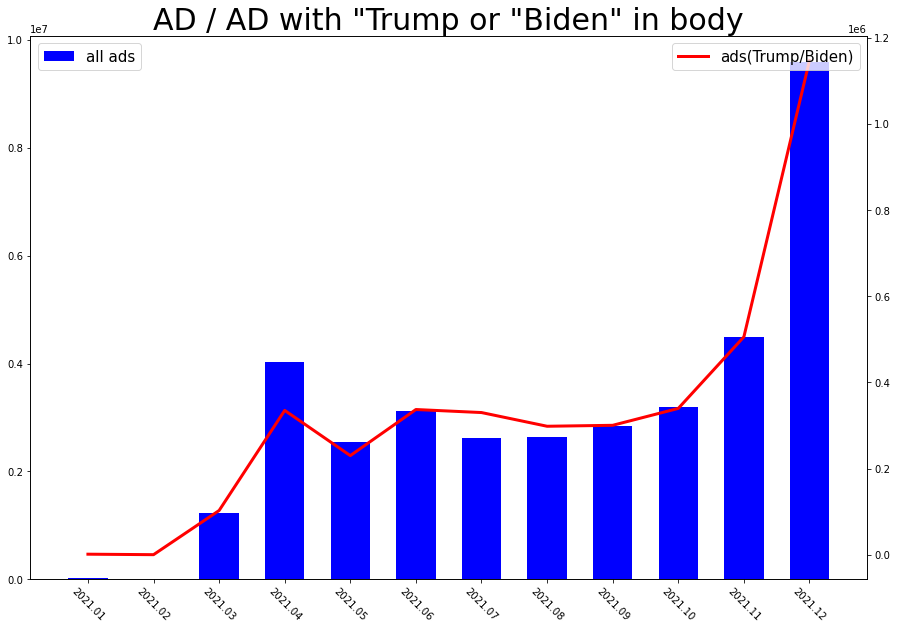

In [33]:
months_2021 = ['2021.01','2021.02','2021.03','2021.04','2021.05','2021.06','2021.07','2021.08','2021.09','2021.10','2021.11','2021.12']

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
plt.rcParams['axes.unicode_minus'] = False

x = months_2021
y1 = count_months
y2 = count_BT_months
plt.bar(x, y1, width=0.6, color = 'b', label = 'all ads')  
plt.legend(loc = 'upper left', fontsize = 15)  
plt.xticks(rotation = 315)
plt.title(label='AD / AD with "Trump or "Biden" in body', fontdict={'color': 'k', 'size': 30}, loc='center')

# 使用twinx()函式為圖表新增次座標軸
plt.twinx()  
plt.plot(x, y2, color = 'r', linewidth = 3, label = 'ads(Trump/Biden)')  
plt.legend(loc = 'upper right', fontsize = 15)  

plt.show()

In [261]:
from pyspark.sql.functions import arrays_zip, col, explode
df_region_1 = df_1.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region"))
df_region_1 = df_region_1.select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution"))
df_region_1 = df_region_1.select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region")
df_region_1 = df_region_1.withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False)
df_region_1.show(truncate=False)

+-----------------------+------------------+
|region                 |sum(percentage)   |
+-----------------------+------------------+
|Georgia                |26079.984713999904|
|All (Automated App Ads)|2802.999951       |
|California             |313.5507540000001 |
|Texas                  |205.9812960000004 |
|Florida                |177.1716649999999 |
|New York               |175.2848379999999 |
|Pennsylvania           |145.19182699999988|
|New Jersey             |136.94606599999992|
|Washington             |111.04802800000016|
|Ohio                   |108.776818        |
|Alabama                |106.12985800000003|
|Tennessee              |94.6330399999999  |
|Kentucky               |83.98667499999995 |
|Massachusetts          |83.88824299999999 |
|Colorado               |81.84181099999986 |
|Connecticut            |80.457387         |
|Oklahoma               |79.31084500000004 |
|Missouri               |77.963374         |
|Illinois               |75.75543700000009 |
|Mississip

In [262]:
df_region_2 = df_2.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False)
df_region_2.show(truncate=False)

+-----------------------+------------------+
|region                 |sum(percentage)   |
+-----------------------+------------------+
|All (Automated App Ads)|2438.999979       |
|Georgia                |204.893847        |
|Texas                  |112.65848900000012|
|Pennsylvania           |93.56942999999998 |
|Washington             |89.60202800000008 |
|Florida                |88.57675100000013 |
|New Jersey             |75.02955499999993 |
|North Carolina         |74.19804399999994 |
|New York               |69.24729399999998 |
|California             |62.36373199999998 |
|Virginia               |59.00088199999997 |
|Indiana                |57.830943         |
|Tennessee              |57.77667299999998 |
|Colorado               |56.58316000000001 |
|Alabama                |51.86113499999997 |
|Ohio                   |51.78692400000003 |
|Kentucky               |42.36288899999997 |
|South Carolina         |42.27581499999998 |
|Wisconsin              |40.84297499999997 |
|Missouri 

In [264]:
df_region_3 = df_3.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False)
df_region_3.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |122508.35652200018|
|Texas         |99782.1742890002  |
|New York      |72904.38195800017 |
|Illinois      |66725.55082500026 |
|Florida       |65636.39886400026 |
|Pennsylvania  |50423.198108000215|
|Virginia      |40665.275193000125|
|North Carolina|39094.49179200015 |
|Ohio          |35106.70256500006 |
|Washington    |34154.2267200001  |
|Michigan      |33176.99180000007 |
|Georgia       |32822.64157500009 |
|Wisconsin     |32585.51853000009 |
|New Jersey    |28160.91632800004 |
|Arizona       |27341.392702000037|
|Missouri      |27259.88384400001 |
|Massachusetts |26836.80534200004 |
|Colorado      |26573.70410600005 |
|Maryland      |24170.97458799999 |
|Oregon        |23275.042314000002|
+--------------+------------------+
only showing top 20 rows



In [27]:
df_region_4 = df_4.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False)
df_region_4.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |391382.42463300057|
|Texas         |363413.8894320003 |
|New York      |243610.14313400027|
|Florida       |225830.41031100063|
|Pennsylvania  |178350.34806200035|
|Illinois      |161493.14645200045|
|Virginia      |139491.2911000006 |
|Washington    |130919.21464700047|
|Ohio          |124048.22757900038|
|Michigan      |113774.25765600023|
|North Carolina|109502.73120600033|
|Georgia       |105717.04025000024|
|New Jersey    |100385.5104970003 |
|Arizona       |97618.91255900018 |
|Minnesota     |90128.84778800003 |
|Colorado      |84003.77927499996 |
|Oregon        |83917.41390600009 |
|Maryland      |82298.66872900001 |
|Massachusetts |81984.72256499984 |
|Wisconsin     |79110.61072600017 |
+--------------+------------------+
only showing top 20 rows



In [28]:
df_region_5 = df_5.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False)
df_region_5.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |264205.66366600036|
|New York      |207224.31806200033|
|Texas         |197595.69104100048|
|Pennsylvania  |132262.94148700032|
|Florida       |130558.33649200051|
|Virginia      |103176.08130200056|
|Illinois      |88799.50502300022 |
|New Jersey    |81758.3571090003  |
|Michigan      |75984.21998900016 |
|Ohio          |73344.04532700016 |
|North Carolina|68504.8512110001  |
|Georgia       |67446.22190200016 |
|Colorado      |63165.746453000116|
|Arizona       |58764.26123500016 |
|Washington    |57905.72972900013 |
|Oregon        |54756.061716000055|
|Massachusetts |49008.53105700004 |
|Maryland      |48515.706813000026|
|Minnesota     |48234.98134900001 |
|Wisconsin     |42926.39541399999 |
+--------------+------------------+
only showing top 20 rows



In [29]:
df_region_6 = df_6.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False)
df_region_6.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |334619.7972590006 |
|New York      |311628.4904420007 |
|Texas         |209242.88424600087|
|Florida       |164842.79785500042|
|Pennsylvania  |148388.3677300005 |
|Virginia      |111337.73031000061|
|Illinois      |105723.27258400031|
|New Jersey    |104051.3854100004 |
|Ohio          |95398.43588000032 |
|North Carolina|92815.18233700038 |
|Michigan      |91455.80078900032 |
|Georgia       |87815.53251100033 |
|Arizona       |81778.85722600033 |
|Colorado      |76632.28890200015 |
|Washington    |70409.34460100025 |
|Oregon        |65901.18613000009 |
|Maryland      |64993.28678300004 |
|Minnesota     |57371.83930600005 |
|Massachusetts |55356.378750000134|
|Wisconsin     |51915.15647000003 |
+--------------+------------------+
only showing top 20 rows



In [30]:
df_region_7 = df_7.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False)
df_region_7.show(truncate=False)

2022-05-22 12:49:21,023 ERROR cluster.YarnScheduler: Lost executor 360 on ip-100-64-74-210.ap-southeast-2.compute.internal: Container marked as failed: container_1652753568617_1728_01_000415 on host: ip-100-64-74-210.ap-southeast-2.compute.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
2022-05-22 12:49:21,536 WARN cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 360 for reason Container marked as failed: container_1652753568617_1728_01_000415 on host: ip-100-64-74-210.ap-southeast-2.compute.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.


+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |277752.74681300047|
|Texas         |183083.04519100097|
|Florida       |154936.84743100038|
|New York      |135728.51462500056|
|Pennsylvania  |104797.49024500033|
|Michigan      |99893.92901900045 |
|Virginia      |94743.98661900035 |
|Ohio          |91236.80202000022 |
|Arizona       |89966.23071500055 |
|Illinois      |88764.08655300028 |
|North Carolina|81789.42472400035 |
|Georgia       |81460.66110600029 |
|Washington    |68739.66913700018 |
|New Jersey    |64972.97179600007 |
|Colorado      |61075.08623300013 |
|Maryland      |59117.66695600007 |
|Massachusetts |54199.258960000094|
|Oregon        |50524.810092000014|
|Wisconsin     |46030.61979900002 |
|Minnesota     |45790.19122100003 |
+--------------+------------------+
only showing top 20 rows



In [31]:
df_region_8 = df_8.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False)
df_region_8.show(truncate=False)

2022-05-22 14:04:58,181 ERROR cluster.YarnScheduler: Lost executor 399 on ip-100-64-74-100.ap-southeast-2.compute.internal: Container marked as failed: container_1652753568617_1728_01_000457 on host: ip-100-64-74-100.ap-southeast-2.compute.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
2022-05-22 14:04:58,181 WARN cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 399 for reason Container marked as failed: container_1652753568617_1728_01_000457 on host: ip-100-64-74-100.ap-southeast-2.compute.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.


+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |273119.2187660002 |
|Texas         |170281.14109900052|
|Florida       |138569.37975000037|
|New York      |121566.1193860003 |
|Pennsylvania  |98218.78825900018 |
|Virginia      |95699.45013000046 |
|Illinois      |90283.13089200018 |
|Ohio          |83330.5872240002  |
|Arizona       |80974.18951600036 |
|Georgia       |80352.54971100023 |
|North Carolina|77432.95388400016 |
|Michigan      |77427.5983190002  |
|New Jersey    |62889.287905000034|
|Washington    |62598.36091800013 |
|Colorado      |58432.209886000055|
|Massachusetts |50044.82938399998 |
|Wisconsin     |48493.113055999966|
|Maryland      |48219.474899999936|
|Oregon        |45031.78003799996 |
|Minnesota     |41404.675682999994|
+--------------+------------------+
only showing top 20 rows



In [32]:
df_region_9 = df_9.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False)
df_region_9.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |258616.54933800024|
|Texas         |163175.1681570001 |
|Florida       |127670.70988400017|
|New York      |124719.20474300014|
|Virginia      |103970.48239400037|
|Pennsylvania  |97231.7962790001  |
|Ohio          |87024.97830300017 |
|Georgia       |84867.8004410003  |
|New Jersey    |82330.65815200024 |
|Michigan      |74130.46756699997 |
|Arizona       |72897.98663300011 |
|Illinois      |72724.47949700007 |
|North Carolina|71495.76629700008 |
|Washington    |61597.302721000044|
|Colorado      |50930.94101599998 |
|Wisconsin     |47980.85542299995 |
|Massachusetts |46547.73010700007 |
|Minnesota     |44526.45405299994 |
|Maryland      |44344.26851799995 |
|Oregon        |43975.27198799994 |
+--------------+------------------+
only showing top 20 rows



In [33]:
df_region_10 = df_10.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False)
df_region_10.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |222221.73289200012|
|New York      |183004.36150600004|
|Texas         |179591.42728900036|
|Virginia      |179059.63189400034|
|Florida       |139019.21538800027|
|Pennsylvania  |137393.64342600002|
|New Jersey    |118480.27307800023|
|Ohio          |114923.54481200011|
|Georgia       |93724.38841700013 |
|Michigan      |88008.39265300008 |
|Arizona       |73816.36581500008 |
|North Carolina|71751.77968700006 |
|Illinois      |68979.464819      |
|Colorado      |64897.37302500005 |
|Washington    |63758.65598000006 |
|Minnesota     |56694.75414900001 |
|Massachusetts |50223.81004900004 |
|Wisconsin     |47521.274568999914|
|Indiana       |45459.76467799994 |
|Maryland      |40596.10421199999 |
+--------------+------------------+
only showing top 20 rows



In [34]:
df_region_11 = df_11.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False)
df_region_11.show(truncate=False)

2022-05-22 14:48:58,310 ERROR cluster.YarnScheduler: Lost executor 476 on ip-100-64-74-100.ap-southeast-2.compute.internal: Container marked as failed: container_1652753568617_1728_01_000543 on host: ip-100-64-74-100.ap-southeast-2.compute.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
2022-05-22 14:48:58,311 WARN cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 476 for reason Container marked as failed: container_1652753568617_1728_01_000543 on host: ip-100-64-74-100.ap-southeast-2.compute.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.


+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |391053.9342650006 |
|Texas         |303801.4630510008 |
|New York      |218174.507111     |
|Florida       |214715.8669770003 |
|Pennsylvania  |176613.3596749999 |
|New Jersey    |124172.88049700008|
|Georgia       |124108.98280400013|
|Ohio          |124035.64568499995|
|Michigan      |123603.31997700025|
|Illinois      |116045.69484199985|
|Virginia      |115808.31328200012|
|Arizona       |114626.85167300029|
|North Carolina|111773.58232499995|
|Washington    |96312.53511600007 |
|Maryland      |79245.5574820001  |
|Indiana       |73408.00278799997 |
|Wisconsin     |72950.8519359999  |
|Colorado      |70737.77742799996 |
|Missouri      |67918.53748699992 |
|Oregon        |64826.85190199993 |
+--------------+------------------+
only showing top 20 rows



In [228]:
df_region_12 = df_12.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False)
df_region_12.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |868967.6006620014 |
|Texas         |705217.3655630006 |
|Florida       |509900.5986710011 |
|New York      |410235.6159839998 |
|Pennsylvania  |378541.81566099933|
|Michigan      |290629.75776200014|
|Ohio          |264571.6957830001 |
|Georgia       |260412.82226200006|
|Illinois      |250478.36880300028|
|North Carolina|249662.4327309998 |
|Arizona       |241321.33125800084|
|Washington    |237188.81765799975|
|Virginia      |233981.26176799997|
|New Jersey    |203838.67170200043|
|South Carolina|166785.77958800015|
|Wisconsin     |156122.59390899984|
|Colorado      |155910.24263799988|
|Indiana       |154488.77924399983|
|Missouri      |153397.12664399986|
|Maryland      |149063.8915959998 |
+--------------+------------------+
only showing top 20 rows



In [55]:
df_region_list = [df_region_1, df_region_2, df_region_3, df_region_4, df_region_5, df_region_6, df_region_7, df_region_8,df_region_9,df_region_10, df_region_11,df_region_12]

In [82]:
x = df_region_1.select("sum(percentage)").where('region = "California"').first()[0]
print(x)

313.5507540000001


In [229]:
US_states = df_region_12.select("region").where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"').rdd.flatMap(lambda x: x).collect()
print(US_states)

['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Michigan', 'Ohio', 'Georgia', 'Illinois', 'North Carolina', 'Arizona', 'Washington', 'Virginia', 'New Jersey', 'South Carolina', 'Wisconsin', 'Colorado', 'Indiana', 'Missouri', 'Maryland', 'Tennessee', 'Oregon', 'Massachusetts', 'Minnesota', 'Louisiana', 'Nevada', 'Kentucky', 'Oklahoma', 'Alabama', 'Iowa', 'Kansas', 'New Hampshire', 'Arkansas', 'Connecticut', 'New Mexico', 'Idaho', 'Mississippi', 'Utah', 'Maine', 'West Virginia', 'Montana', 'Nebraska', 'Alaska', 'Delaware', 'Hawaii', 'South Dakota', 'Vermont', 'Wyoming', 'North Dakota', 'Rhode Island']


In [113]:
print(len(US_states))

50


In [95]:
z = df_region_12.select("region").rdd.flatMap(lambda x: x).collect()
print(z)

['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Michigan', 'Ohio', 'Georgia', 'Illinois', 'North Carolina', 'Arizona', 'Washington', 'Virginia', 'New Jersey', 'South Carolina', 'Wisconsin', 'Colorado', 'Indiana', 'Missouri', 'Maryland', 'Tennessee', 'Oregon', 'Massachusetts', 'Minnesota', 'Louisiana', 'Nevada', 'Kentucky', 'Oklahoma', 'Alabama', 'Iowa', 'Washington, District of Columbia', 'Kansas', 'New Hampshire', 'Arkansas', 'Connecticut', 'New Mexico', 'Idaho', 'Mississippi', 'Utah', 'Maine', 'West Virginia', 'Montana', 'Nebraska', 'Alaska', 'Delaware', 'Hawaii', 'South Dakota', 'Vermont', 'Wyoming', 'North Dakota', 'Rhode Island', 'All (Automated App Ads)', 'San Juan', 'Bayamón', 'Guam', 'Unknown', 'Ponce', 'Caguas', 'Carolina', 'Baja California', 'England', 'Mayagüez', 'Guaynabo', 'Distrito Nacional', 'Ontario', 'Arecibo', 'Buenos Aires', 'Distrito Federal', 'Jalisco', 'Distrito Especial', 'State of Mexico', 'Lisbon District', 'Quebec', 'Santiago Metropolitan Regio

In [72]:
df_US_region_1 = df_region_1.select("region","sum(percentage)").where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
temp_dict_US_1 = df_US_region_1.rdd.map(lambda row: row.asDict()).collect()
dict_US_1 = {d['region']: d['sum(percentage)'] for d in temp_dict_US_1}
dict_US_1

{'Georgia': 26079.984713999904,
 'California': 313.5507540000001,
 'Texas': 205.9812960000004,
 'Florida': 177.1716649999999,
 'New York': 175.28483799999992,
 'Pennsylvania': 145.19182699999988,
 'New Jersey': 136.94606599999992,
 'Washington': 111.04802800000016,
 'Ohio': 108.77681799999999,
 'Alabama': 106.12985800000003,
 'Tennessee': 94.6330399999999,
 'Kentucky': 83.98667499999996,
 'Massachusetts': 83.88824299999999,
 'Colorado': 81.84181099999986,
 'Connecticut': 80.457387,
 'Oklahoma': 79.31084500000004,
 'Missouri': 77.963374,
 'Illinois': 75.75543700000009,
 'Mississippi': 71.40323499999992,
 'Wisconsin': 67.6053869999999,
 'North Carolina': 67.28144899999998,
 'Virginia': 67.12572699999994,
 'Arizona': 66.24205300000004,
 'North Dakota': 62.30849300000002,
 'Michigan': 62.08257299999994,
 'Indiana': 56.32621499999996,
 'Louisiana': 53.24334499999996,
 'Maryland': 51.51655200000005,
 'Maine': 50.55539699999996,
 'Minnesota': 47.07674700000004,
 'Idaho': 43.606348000000025,
 

In [73]:
df_US_region_2 = df_region_2.select("region","sum(percentage)").where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
temp_dict_US_2 = df_US_region_2.rdd.map(lambda row: row.asDict()).collect()
dict_US_2 = {d['region']: d['sum(percentage)'] for d in temp_dict_US_2}
dict_US_2

{'Georgia': 204.893847,
 'Texas': 112.658489,
 'Pennsylvania': 93.56943000000001,
 'Washington': 89.60202799999998,
 'Florida': 88.57675099999999,
 'New Jersey': 75.029555,
 'North Carolina': 74.19804400000001,
 'New York': 69.24729400000002,
 'California': 62.363732000000006,
 'Virginia': 59.000882000000004,
 'Indiana': 57.83094299999998,
 'Tennessee': 57.77667300000001,
 'Colorado': 56.58316000000001,
 'Alabama': 51.861135,
 'Ohio': 51.78692399999999,
 'Kentucky': 42.362889,
 'South Carolina': 42.275814999999994,
 'Wisconsin': 40.84297500000001,
 'Missouri': 40.21193199999999,
 'Illinois': 39.072915999999985,
 'Massachusetts': 38.148084000000004,
 'Michigan': 36.808192999999996,
 'Utah': 31.740859,
 'Arizona': 30.596745999999996,
 'Maryland': 28.309504,
 'Oklahoma': 26.950750999999993,
 'Louisiana': 26.577168,
 'Idaho': 21.525736,
 'Mississippi': 21.280549999999998,
 'Oregon': 21.004375999999997,
 'Nebraska': 18.698732,
 'Connecticut': 18.418805000000003,
 'Minnesota': 17.66801000000

In [74]:
df_US_region_3 = df_region_3.select("region","sum(percentage)").where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
temp_dict_US_3 = df_US_region_3.rdd.map(lambda row: row.asDict()).collect()
dict_US_3 = {d['region']: d['sum(percentage)'] for d in temp_dict_US_3}
dict_US_3

{'California': 122508.35652200019,
 'Texas': 99782.17428900019,
 'New York': 72904.38195800016,
 'Illinois': 66725.55082500025,
 'Florida': 65636.39886400026,
 'Pennsylvania': 50423.19810800021,
 'Virginia': 40665.27519300011,
 'North Carolina': 39094.49179200013,
 'Ohio': 35106.70256500005,
 'Washington': 34154.2267200001,
 'Michigan': 33176.991800000076,
 'Georgia': 32822.641575000096,
 'Wisconsin': 32585.518530000092,
 'New Jersey': 28160.91632800005,
 'Arizona': 27341.392702000034,
 'Missouri': 27259.88384400001,
 'Massachusetts': 26836.80534200004,
 'Colorado': 26573.70410600004,
 'Maryland': 24170.974587999997,
 'Oregon': 23275.042314000006,
 'Minnesota': 22745.420994000004,
 'Tennessee': 19530.493545000012,
 'Alabama': 18987.99745200001,
 'Indiana': 16906.614887999986,
 'Connecticut': 16377.526891999974,
 'Louisiana': 15549.903306999975,
 'South Carolina': 15428.186787999966,
 'Oklahoma': 15116.366447999986,
 'Kentucky': 13395.09830199998,
 'New Mexico': 12980.128512999969,
 'Mi

In [75]:
df_US_region_4 = df_region_4.select("region","sum(percentage)").where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
temp_dict_US_4 = df_US_region_4.rdd.map(lambda row: row.asDict()).collect()
dict_US_4 = {d['region']: d['sum(percentage)'] for d in temp_dict_US_4}
dict_US_4

{'California': 391382.4246330007,
 'Texas': 363413.88943200046,
 'New York': 243610.1431340003,
 'Florida': 225830.41031100068,
 'Pennsylvania': 178350.34806200038,
 'Illinois': 161493.14645200045,
 'Virginia': 139491.29110000058,
 'Washington': 130919.21464700048,
 'Ohio': 124048.22757900042,
 'Michigan': 113774.25765600022,
 'North Carolina': 109502.73120600029,
 'Georgia': 105717.04025000024,
 'New Jersey': 100385.51049700032,
 'Arizona': 97618.91255900025,
 'Minnesota': 90128.84778800003,
 'Colorado': 84003.77927499996,
 'Oregon': 83917.41390600006,
 'Maryland': 82298.66872899998,
 'Massachusetts': 81984.72256499984,
 'Wisconsin': 79110.61072600016,
 'Missouri': 69661.65267699992,
 'Tennessee': 61976.19161799998,
 'Indiana': 61004.32861399994,
 'Louisiana': 53949.17172699991,
 'Connecticut': 50831.64967499986,
 'Alabama': 47936.067505999905,
 'South Carolina': 46558.15289299997,
 'Oklahoma': 46494.790191999906,
 'Kentucky': 41319.6597019999,
 'Nevada': 38821.45054999986,
 'Iowa': 3

In [76]:
df_US_region_5 = df_region_5.select("region","sum(percentage)").where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
temp_dict_US_5 = df_US_region_5.rdd.map(lambda row: row.asDict()).collect()
dict_US_5 = {d['region']: d['sum(percentage)'] for d in temp_dict_US_5}
dict_US_5

2022-05-24 04:00:21,113 ERROR cluster.YarnScheduler: Lost executor 954 on ip-100-64-74-130.ap-southeast-2.compute.internal: Container marked as failed: container_1652753568617_1728_01_001045 on host: ip-100-64-74-130.ap-southeast-2.compute.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
2022-05-24 04:00:21,115 WARN cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 954 for reason Container marked as failed: container_1652753568617_1728_01_001045 on host: ip-100-64-74-130.ap-southeast-2.compute.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.


{'California': 264205.6636660003,
 'New York': 207224.31806200038,
 'Texas': 197595.6910410005,
 'Pennsylvania': 132262.94148700035,
 'Florida': 130558.3364920005,
 'Virginia': 103176.08130200053,
 'Illinois': 88799.50502300018,
 'New Jersey': 81758.35710900028,
 'Michigan': 75984.21998900016,
 'Ohio': 73344.04532700015,
 'North Carolina': 68504.85121100009,
 'Georgia': 67446.22190200014,
 'Colorado': 63165.746453000145,
 'Arizona': 58764.26123500017,
 'Washington': 57905.72972900014,
 'Oregon': 54756.06171600006,
 'Massachusetts': 49008.53105700004,
 'Maryland': 48515.70681300003,
 'Minnesota': 48234.98134900001,
 'Wisconsin': 42926.395414000006,
 'Indiana': 36550.476276000016,
 'Missouri': 35627.369773999984,
 'Connecticut': 33501.81913199999,
 'Tennessee': 32130.41355199995,
 'Kentucky': 30567.984453999976,
 'Nevada': 29855.42233399998,
 'New Mexico': 29237.93782099996,
 'Louisiana': 28374.70110099995,
 'South Carolina': 27685.309217999915,
 'Oklahoma': 26467.31181399994,
 'Iowa': 2

In [77]:
df_US_region_6 = df_region_6.select("region","sum(percentage)").where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
temp_dict_US_6 = df_US_region_6.rdd.map(lambda row: row.asDict()).collect()
dict_US_6 = {d['region']: d['sum(percentage)'] for d in temp_dict_US_6}
dict_US_6

{'California': 334619.7972590006,
 'New York': 311628.4904420007,
 'Texas': 209242.88424600093,
 'Florida': 164842.79785500054,
 'Pennsylvania': 148388.36773000046,
 'Virginia': 111337.73031000057,
 'Illinois': 105723.27258400035,
 'New Jersey': 104051.38541000038,
 'Ohio': 95398.43588000031,
 'North Carolina': 92815.18233700033,
 'Michigan': 91455.80078900029,
 'Georgia': 87815.5325110003,
 'Arizona': 81778.85722600034,
 'Colorado': 76632.28890200015,
 'Washington': 70409.34460100028,
 'Oregon': 65901.18613000006,
 'Maryland': 64993.28678300003,
 'Minnesota': 57371.83930600004,
 'Massachusetts': 55356.37875000013,
 'Wisconsin': 51915.15647000003,
 'Indiana': 47790.88590400007,
 'Missouri': 44878.76935700001,
 'Tennessee': 41059.42909300001,
 'South Carolina': 39058.38062299994,
 'Kentucky': 38364.45219099996,
 'Louisiana': 34136.201546999975,
 'Connecticut': 33231.90848199997,
 'Nevada': 33022.599116999925,
 'Alabama': 32745.044944999965,
 'Iowa': 32107.036483999964,
 'Oklahoma': 3176

In [78]:
df_US_region_7 = df_region_7.select("region","sum(percentage)").where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
temp_dict_US_7 = df_US_region_7.rdd.map(lambda row: row.asDict()).collect()
dict_US_7 = {d['region']: d['sum(percentage)'] for d in temp_dict_US_7}
dict_US_7

{'California': 277752.7468130006,
 'Texas': 183083.0451910011,
 'Florida': 154936.8474310004,
 'New York': 135728.51462500065,
 'Pennsylvania': 104797.49024500036,
 'Michigan': 99893.9290190004,
 'Virginia': 94743.98661900034,
 'Ohio': 91236.80202000018,
 'Arizona': 89966.23071500046,
 'Illinois': 88764.08655300023,
 'North Carolina': 81789.42472400035,
 'Georgia': 81460.6611060003,
 'Washington': 68739.66913700021,
 'New Jersey': 64972.97179600007,
 'Colorado': 61075.08623300013,
 'Maryland': 59117.66695600009,
 'Massachusetts': 54199.258960000094,
 'Oregon': 50524.81009200001,
 'Wisconsin': 46030.619799000015,
 'Minnesota': 45790.191221000045,
 'Indiana': 44467.21405000002,
 'Missouri': 41656.146928999995,
 'Tennessee': 40049.64619900006,
 'Kentucky': 37525.47205900002,
 'South Carolina': 34175.25821799993,
 'Iowa': 31157.663714999948,
 'Nevada': 30454.184369999915,
 'Louisiana': 30451.74565899995,
 'Alabama': 29832.72090999993,
 'Oklahoma': 28665.090883999925,
 'Kansas': 27495.84760

In [79]:
df_US_region_8 = df_region_8.select("region","sum(percentage)").where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
temp_dict_US_8 = df_US_region_8.rdd.map(lambda row: row.asDict()).collect()
dict_US_8 = {d['region']: d['sum(percentage)'] for d in temp_dict_US_8}
dict_US_8

{'California': 273119.2187660002,
 'Texas': 170281.1410990005,
 'Florida': 138569.37975000034,
 'New York': 121566.11938600036,
 'Pennsylvania': 98218.78825900015,
 'Virginia': 95699.45013000048,
 'Illinois': 90283.13089200018,
 'Ohio': 83330.58722400019,
 'Arizona': 80974.18951600036,
 'Georgia': 80352.54971100023,
 'North Carolina': 77432.95388400015,
 'Michigan': 77427.59831900027,
 'New Jersey': 62889.28790500005,
 'Washington': 62598.36091800015,
 'Colorado': 58432.20988600005,
 'Massachusetts': 50044.829383999975,
 'Wisconsin': 48493.11305599999,
 'Maryland': 48219.47489999993,
 'Oregon': 45031.78003799993,
 'Minnesota': 41404.67568299998,
 'Indiana': 40079.048635999985,
 'Missouri': 38834.31311800001,
 'Kentucky': 38110.30297999999,
 'Tennessee': 36856.23797899997,
 'Alabama': 31643.124157999944,
 'Nevada': 31051.94597099995,
 'South Carolina': 31006.902479999902,
 'New Hampshire': 30566.40744799999,
 'Iowa': 29487.340526999917,
 'Louisiana': 29199.27174399996,
 'Oklahoma': 2888

In [80]:
df_US_region_9 = df_region_9.select("region","sum(percentage)").where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
temp_dict_US_9 = df_US_region_9.rdd.map(lambda row: row.asDict()).collect()
dict_US_9 = {d['region']: d['sum(percentage)'] for d in temp_dict_US_9}
dict_US_9

{'California': 258616.54933800027,
 'Texas': 163175.16815700007,
 'Florida': 127670.70988400021,
 'New York': 124719.20474300017,
 'Virginia': 103970.48239400034,
 'Pennsylvania': 97231.79627900015,
 'Ohio': 87024.97830300017,
 'Georgia': 84867.8004410003,
 'New Jersey': 82330.65815200022,
 'Michigan': 74130.46756699999,
 'Arizona': 72897.98663300015,
 'Illinois': 72724.47949700002,
 'North Carolina': 71495.76629700005,
 'Washington': 61597.302721000044,
 'Colorado': 50930.94101599998,
 'Wisconsin': 47980.855422999935,
 'Massachusetts': 46547.73010700007,
 'Minnesota': 44526.45405299995,
 'Maryland': 44344.26851799996,
 'Oregon': 43975.27198799994,
 'Indiana': 43240.236876999945,
 'Missouri': 36321.74978399993,
 'South Carolina': 34239.76165699993,
 'Tennessee': 33638.82179499995,
 'Nevada': 32505.283610999923,
 'New Hampshire': 28699.838274999947,
 'Iowa': 28688.29327599992,
 'Kansas': 26201.999164999903,
 'Kentucky': 25122.713704999904,
 'Oklahoma': 25012.55201299996,
 'Louisiana': 2

In [81]:
df_US_region_10 = df_region_10.select("region","sum(percentage)").where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
temp_dict_US_10 = df_US_region_10.rdd.map(lambda row: row.asDict()).collect()
dict_US_10 = {d['region']: d['sum(percentage)'] for d in temp_dict_US_10}
dict_US_10

{'California': 222221.73289200012,
 'New York': 183004.36150600007,
 'Texas': 179591.4272890004,
 'Virginia': 179059.63189400025,
 'Florida': 139019.2153880003,
 'Pennsylvania': 137393.64342600008,
 'New Jersey': 118480.27307800017,
 'Ohio': 114923.5448120001,
 'Georgia': 93724.38841700013,
 'Michigan': 88008.39265300005,
 'Arizona': 73816.36581500007,
 'North Carolina': 71751.77968700007,
 'Illinois': 68979.46481900003,
 'Colorado': 64897.373025000044,
 'Washington': 63758.65598000003,
 'Minnesota': 56694.754149000015,
 'Massachusetts': 50223.81004900005,
 'Wisconsin': 47521.274568999914,
 'Indiana': 45459.76467799995,
 'Maryland': 40596.10421199997,
 'Oregon': 39909.64380799993,
 'South Carolina': 39842.16444099994,
 'Connecticut': 36890.87963399993,
 'Missouri': 36651.6421709999,
 'Tennessee': 34422.506026999916,
 'Nevada': 32731.619297999914,
 'Louisiana': 32053.87139799992,
 'Kansas': 31853.585814999955,
 'Iowa': 31019.44441199992,
 'Kentucky': 28330.91975299991,
 'Utah': 27395.56

In [82]:
df_US_region_11 = df_region_11.select("region","sum(percentage)").where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
temp_dict_US_11 = df_US_region_11.rdd.map(lambda row: row.asDict()).collect()
dict_US_11 = {d['region']: d['sum(percentage)'] for d in temp_dict_US_11}
dict_US_11

{'California': 391053.9342650006,
 'Texas': 303801.4630510009,
 'New York': 218174.5071109999,
 'Florida': 214715.86697700023,
 'Pennsylvania': 176613.35967499996,
 'New Jersey': 124172.88049700015,
 'Georgia': 124108.98280400016,
 'Ohio': 124035.64568499998,
 'Michigan': 123603.31997700018,
 'Illinois': 116045.6948419999,
 'Virginia': 115808.3132820001,
 'Arizona': 114626.85167300024,
 'North Carolina': 111773.58232499998,
 'Washington': 96312.5351160001,
 'Maryland': 79245.55748200013,
 'Indiana': 73408.00278799997,
 'Wisconsin': 72950.8519359999,
 'Colorado': 70737.77742799991,
 'Missouri': 67918.53748699997,
 'Oregon': 64826.85190199997,
 'Massachusetts': 61799.11901799992,
 'Minnesota': 60636.5205159999,
 'South Carolina': 60199.271504999946,
 'Tennessee': 58786.19980399989,
 'Louisiana': 55948.50761799994,
 'Nevada': 48926.74010299991,
 'Kentucky': 45402.139167999936,
 'Iowa': 44819.85264099984,
 'Oklahoma': 43359.3243859999,
 'Alabama': 43280.75666999994,
 'New Hampshire': 40493

In [84]:
df_US_region_12 = df_region_12.select("region","sum(percentage)").where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
temp_dict_US_12 = df_US_region_12.rdd.map(lambda row: row.asDict()).collect()
dict_US_12 = {d['region']: d['sum(percentage)'] for d in temp_dict_US_12}
dict_US_12

{'California': 868967.6006620013,
 'Texas': 705217.3655630001,
 'Florida': 509900.598671001,
 'New York': 410235.61598399986,
 'Pennsylvania': 378541.8156609991,
 'Michigan': 290629.75776200026,
 'Ohio': 264571.6957829999,
 'Georgia': 260412.8222620002,
 'Illinois': 250478.36880300022,
 'North Carolina': 249662.43273099978,
 'Arizona': 241321.331258001,
 'Washington': 237188.81765799978,
 'Virginia': 233981.26176800017,
 'New Jersey': 203838.67170200046,
 'South Carolina': 166785.77958800018,
 'Wisconsin': 156122.59390899976,
 'Colorado': 155910.242638,
 'Indiana': 154488.7792439998,
 'Missouri': 153397.12664399995,
 'Maryland': 149063.8915959998,
 'Tennessee': 141432.65383399988,
 'Oregon': 136999.46366799984,
 'Massachusetts': 129065.7752949999,
 'Minnesota': 128812.07111299953,
 'Louisiana': 121174.59234599971,
 'Nevada': 106401.82474899958,
 'Kentucky': 101955.76889699983,
 'Oklahoma': 98657.04085199982,
 'Alabama': 97515.52472599986,
 'Iowa': 94454.82118899985,
 'Kansas': 83783.13

In [ ]:
dict_US_list = [dict_US_1, dict_US_2, dict_US_3, dict_US_4, dict_US_5, dict_US_6, dict_US_7, dict_US_8, dict_US_9, dict_US_10, dict_US_11, dict_US_12]

In [111]:
dict_state_count = {}
dict_state_sum = {}
for dict_US in dict_US_list[1:]:
    ad_sum = 0
    for state in US_states:
        ad_sum += dict_US[state]
    
    for state in US_states:
        if state in dict_state_count.keys():
            dict_state_count[state].append(dict_US[state]/ad_sum)
            dict_state_sum[state] += dict_US[state]/ad_sum
        else:
            dict_state_count[state] = [dict_US[state]/ad_sum]
            dict_state_sum[state] = dict_US[state]/ad_sum

dict_state_sum_order = dict(sorted(dict_state_sum.items(), key=lambda item: item[1], reverse=True))
dict_state_top_5 = list(dict_state_sum_order.keys())[:5]
print(dict_state_top_5)

['California', 'Texas', 'New York', 'Florida', 'Pennsylvania']


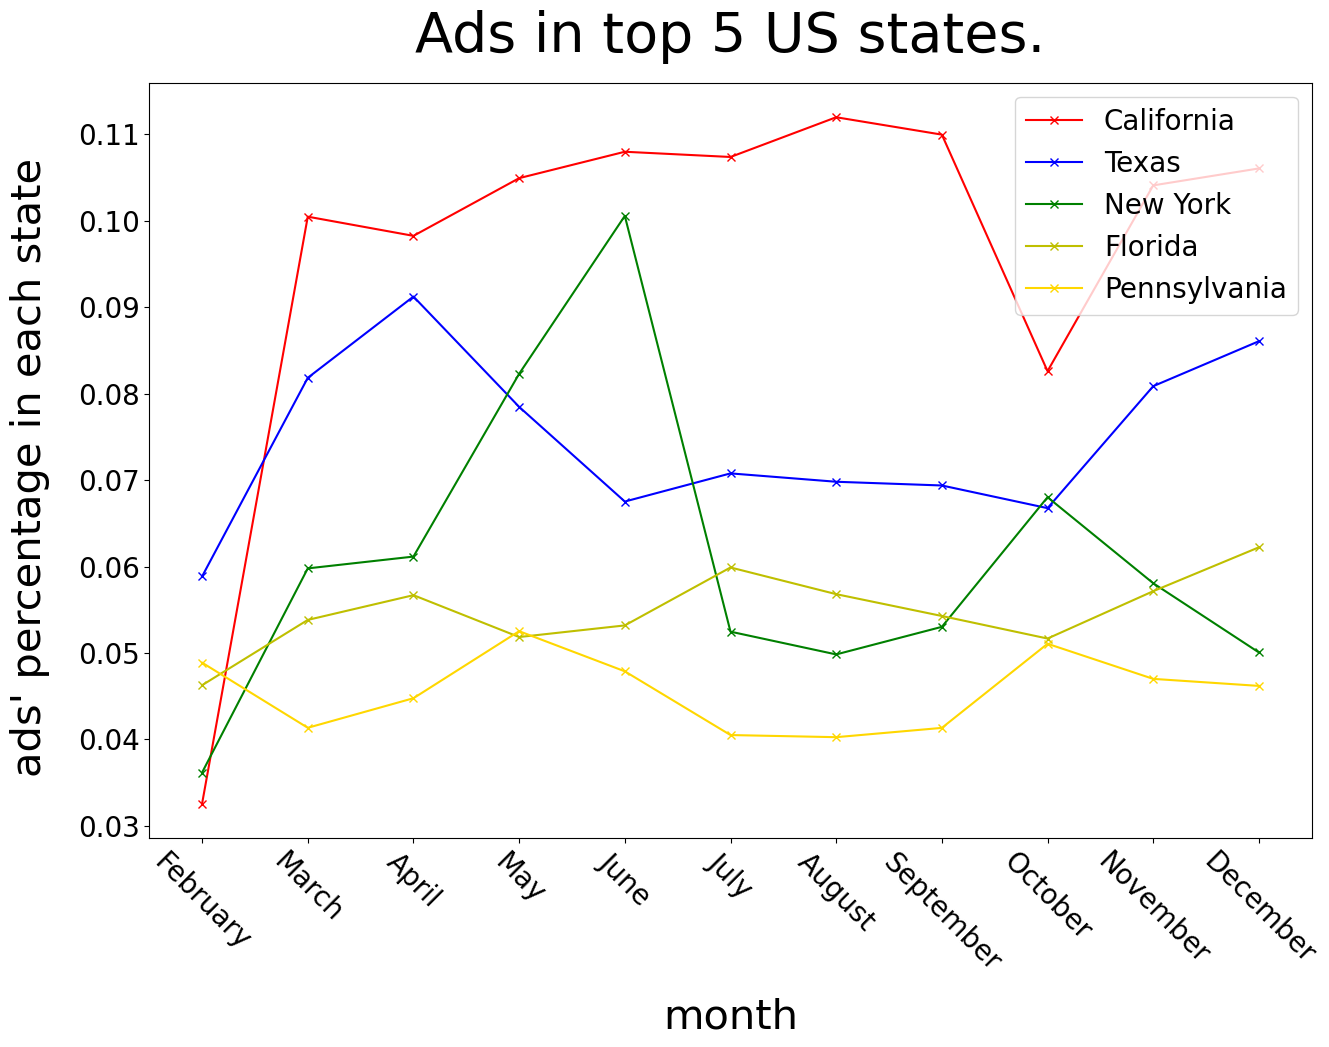

In [129]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

myfont = FontProperties(size=40)
months = ['February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
colors = ['r', 'b', 'g', 'y', 'gold']

plt.figure(figsize=(15,10),dpi=100,linewidth = 2)

color_change = 0
for state in dict_state_top_5:
    plt.plot(months,dict_state_count[state],'x-',color = colors[color_change], label = state)
    color_change += 1
    
plt.title("Ads in top 5 US states.", fontproperties = myfont, x=0.5, y=1.03)
plt.xticks(rotation = 315)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("month", fontsize=30, labelpad = 15)
plt.ylabel("ads' percentage in each state ", fontsize=30, labelpad = 20)
plt.legend(loc = "best", fontsize=20)
plt.show()

In [158]:
month_count = 0
for dict_US in dict_US_list:    
    # Get the Keys and store them in a list
    labels = [str(k) for k in dict_US]
    # Get the Values and store them in a list
    values = [float(dict_US[v]) for v in dict_US]

    value_other = 0
    for value in values[10:len(values)]:
        value_other += value

    labels = labels[0:10]
    labels.append("others")
    values = values[0:10]
    values.append(value_other)
    
    plt.figure(figsize=(17,10))                # 顯示圖框架大小
    separeted = [0.1,0.1,0.1,0,0,0,0,0,0,0,0]  # 依據類別數量，分別設定要突出的區塊
    colors = ['gold','silver','chocolate','y','g','b','r','blueviolet','cyan','deepskyblue','coral']
    months = ['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    plt.pie(values,                            # 數值
            labels = labels,                   # 標籤 
            colors = colors,                   # 區塊顏色
            autopct = "%1.1f%%",               # 將數值百分比並留到小數點一位
            explode = separeted,               # 設定分隔的區塊位置
            pctdistance = 0.6,                 # 數字距圓心的距離
            textprops = {"fontsize" :18},     # 文字大小
            shadow = False)                    # 設定陰影

 
    plt.axis('equal')                                                      # 使圓餅圖比例相等
    plt.title("Ads in each state in {}".format(months[month_count]), {"fontsize" : 24}) # 設定標題及其文字大小
    plt.legend(loc = "best")                                               # 設定圖例及其位置為最佳

    plt.plot()

    plt.show()
    month_count += 1

NameError: name 'dict_US_list' is not defined

In [124]:
#US_states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Michigan', 'Ohio', 'Georgia', 'Illinois', 'North Carolina', 'Arizona', 'Washington', 'Virginia', 'New Jersey', 'South Carolina', 'Wisconsin', 'Colorado', 'Indiana', 'Missouri', 'Maryland', 'Tennessee', 'Oregon', 'Massachusetts', 'Minnesota', 'Louisiana', 'Nevada', 'Kentucky', 'Oklahoma', 'Alabama', 'Iowa', 'Kansas', 'New Hampshire', 'Arkansas', 'Connecticut', 'New Mexico', 'Idaho', 'Mississippi', 'Utah', 'Maine', 'West Virginia', 'Montana', 'Nebraska', 'Alaska', 'Delaware', 'Hawaii', 'South Dakota', 'Vermont', 'Wyoming', 'North Dakota', 'Rhode Island']
df_r_1 = df_1.where('ad_creative_link_caption = "winred.com"')
df_b_1 = df_1.where('ad_creative_link_caption = "secure.actblue.com"')
[df_r_1.count(),df_b_1.count()]

[0, 1631]

In [172]:
df_r_1_count = df_r_1.count()
df_b_1_count = df_b_1.count()
[df_r_1_count,df_b_1_count]

[0, 1631]

In [125]:
df_r_2 = df_2.where('ad_creative_link_caption = "winred.com"')
df_b_2 = df_2.where('ad_creative_link_caption = "secure.actblue.com"')
[df_r_2.count(),df_b_2.count()]

[0, 147]

In [173]:
df_r_2_count = df_r_2.count()
df_b_2_count = df_b_2.count()
[df_r_2_count,df_b_2_count]

[0, 147]

In [126]:
df_r_3 = df_3.where('ad_creative_link_caption = "winred.com"')
df_b_3 = df_3.where('ad_creative_link_caption = "secure.actblue.com"')
[df_r_3.count(),df_b_3.count()]

[1225, 143473]

In [127]:
df_r_4 = df_4.where('ad_creative_link_caption = "winred.com"')
df_b_4 = df_4.where('ad_creative_link_caption = "secure.actblue.com"')
[df_r_4.count(),df_b_4.count()]

[26017, 361374]

In [128]:
df_r_5 = df_5.where('ad_creative_link_caption = "winred.com"')
df_b_5 = df_5.where('ad_creative_link_caption = "secure.actblue.com"')
[df_r_5.count(),df_b_5.count()]

[6327, 207865]

In [129]:
df_r_6 = df_6.where('ad_creative_link_caption = "winred.com"')
df_b_6 = df_6.where('ad_creative_link_caption = "secure.actblue.com"')
[df_r_6.count(),df_b_6.count()]

[19339, 383529]

In [174]:
df_r_3_count = df_r_3.count()
df_b_3_count = df_b_3.count()
[df_r_3_count,df_b_3_count]

df_r_4_count = df_r_4.count()
df_b_4_count = df_b_4.count()
[df_r_4_count,df_b_4_count]

df_r_5_count = df_r_5.count()
df_b_5_count = df_b_5.count()
[df_r_5_count,df_b_5_count]

df_r_6_count = df_r_6.count()
df_b_6_count = df_b_6.count()
[df_r_6_count,df_b_6_count]

[19339, 383529]

In [130]:
df_r_7 = df_7.where('ad_creative_link_caption = "winred.com"')
df_b_7 = df_7.where('ad_creative_link_caption = "secure.actblue.com"')
df_r_7_count = df_r_7.count()
df_b_7_count = df_b_7.count()
[df_r_7_count,df_b_7_count]

[9406, 270943]

In [131]:
df_r_8 = df_8.where('ad_creative_link_caption = "winred.com"')
df_b_8 = df_8.where('ad_creative_link_caption = "secure.actblue.com"')
df_r_8_count = df_r_8.count()
df_b_8_count = df_b_8.count()
[df_r_8_count,df_b_8_count]

[6538, 253630]

In [132]:
df_r_9 = df_9.where('ad_creative_link_caption = "winred.com"')
df_b_9 = df_9.where('ad_creative_link_caption = "secure.actblue.com"')
df_r_9_count = df_r_9.count()
df_b_9_count = df_b_9.count()
[df_r_9_count,df_b_9_count]

[4485, 308662]

In [133]:
df_r_10 = df_10.where('ad_creative_link_caption = "winred.com"')
df_b_10 = df_10.where('ad_creative_link_caption = "secure.actblue.com"')
df_r_10_count = df_r_10.count()
df_b_10_count = df_b_10.count()
[df_r_10_count,df_b_10_count]

[4762, 256759]

In [134]:
df_r_11 = df_11.where('ad_creative_link_caption = "winred.com"')
df_b_11 = df_11.where('ad_creative_link_caption = "secure.actblue.com"')
df_r_11_count = df_r_11.count()
df_b_11_count = df_b_11.count()
[df_r_11_count,df_b_11_count]

[14800, 420295]

In [162]:
df_r_12 = df_12.where('ad_creative_link_caption = "winred.com"')
df_b_12 = df_12.where('ad_creative_link_caption = "secure.actblue.com"')
df_r_12_count = df_r_12.count()
df_b_12_count = df_b_12.count()
[df_r_12_count,df_b_12_count]

[13372, 846020]

In [175]:
df_r_count = [globals()['df_r_'+str(n)+'_count'] for n in range(1,13)]
df_r_count

[0, 0, 1225, 26017, 6327, 19339, 9406, 6538, 4485, 4762, 14800, 13372]

In [176]:
df_b_count = [globals()['df_b_'+str(n)+'_count'] for n in range(1,13)]
df_b_count

[1631,
 147,
 143473,
 361374,
 207865,
 383529,
 270943,
 253630,
 308662,
 256759,
 420295,
 846020]

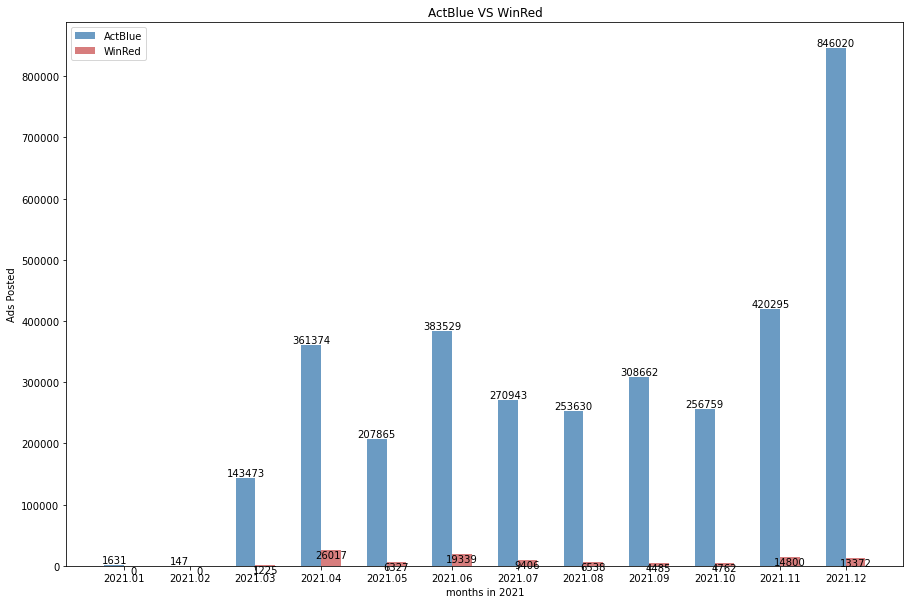

In [209]:
import numpy as np
import matplotlib.pyplot as plt

# 构建数据
x_data = ['2021.01','2021.02','2021.03','2021.04','2021.05','2021.06','2021.07','2021.08','2021.09','2021.10','2021.11','2021.12']
y_data = df_b_count
y_data2 = df_r_count

plt.figure(figsize = (15,10))

bar_width=0.3
# 将X轴数据改为使用range(len(x_data), 就是0、1、2...
plt.bar(x=range(len(x_data)), height=y_data, label='ActBlue',
color='steelblue', alpha=0.8, width=bar_width)
# 将X轴数据改为使用np.arange(len(x_data))+bar_width,
# 就是bar_width、1+bar_width、2+bar_width...这样就和第一个柱状图并列了
plt.bar(x=np.arange(len(x_data))+bar_width, height=y_data2,
label='WinRed', color='indianred', alpha=0.8, width=bar_width)
# 在柱状图上显示具体数值, ha参数控制水平对齐方式, va控制垂直对齐方式
for x, y in enumerate(y_data):
    plt.text(x, y + 100, '%s' % y, ha='center', va='bottom')
for x, y in enumerate(y_data2):
    plt.text(x+bar_width, y + 100, '%s' % y, ha='center', va='top')
plt.xticks(np.arange(len(x_data))+bar_width/2, x_data)
# 设置标题
plt.title("ActBlue VS WinRed")
# 为两条坐标轴设置名称
plt.xlabel("months in 2021")
plt.ylabel("Ads Posted")
# 显示图例
plt.legend()
plt.show()

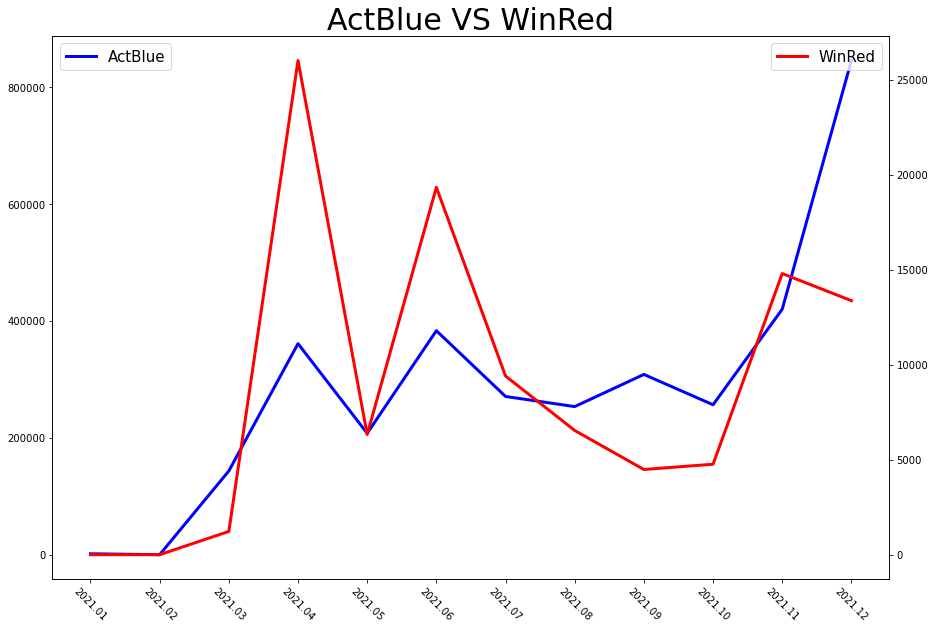

In [211]:
months_2021 = ['2021.01','2021.02','2021.03','2021.04','2021.05','2021.06','2021.07','2021.08','2021.09','2021.10','2021.11','2021.12']

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
plt.rcParams['axes.unicode_minus'] = False

x = months_2021
y1 = df_b_count
y2 = df_r_count
plt.plot(x, y1, color = 'b', linewidth = 3, label = 'ActBlue')  
plt.legend(loc = 'upper left', fontsize = 15)  
plt.xticks(rotation = 315)
plt.title(label='ActBlue VS WinRed', fontdict={'color': 'k', 'size': 30}, loc='center')

# 使用twinx()函式為圖表新增次座標軸
plt.twinx()  
plt.plot(x, y2, color = 'r', linewidth = 3, label = 'WinRed')  
plt.legend(loc = 'upper right', fontsize = 15)  

plt.show()

In [194]:
df_r_US_1 = df_r_1.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_r_US_1.show(truncate=False)
df_b_US_1 = df_b_1.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_b_US_1.show(truncate=False)

+------+---------------+
|region|sum(percentage)|
+------+---------------+
+------+---------------+



+-------+---------------+
|region |sum(percentage)|
+-------+---------------+
|Georgia|1631.0         |
+-------+---------------+



In [150]:
df_r_US_2 = df_r_2.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_r_US_2.show(truncate=False)
df_b_US_2 = df_b_2.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_b_US_2.show(truncate=False)

+------+---------------+
|region|sum(percentage)|
+------+---------------+
+------+---------------+



+-------+---------------+
|region |sum(percentage)|
+-------+---------------+
|Georgia|147.0          |
+-------+---------------+



In [151]:
df_r_US_3 = df_r_3.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_r_US_3.show(truncate=False)
df_b_US_3 = df_b_3.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_b_US_3.show(truncate=False)

+------+---------------+
|region|sum(percentage)|
+------+---------------+
|Texas |1225.0         |
+------+---------------+



+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |19442.777468000008|
|New York      |11607.343504000006|
|Virginia      |9883.730692999992 |
|Texas         |8245.584385999995 |
|North Carolina|7196.833353999994 |
|Pennsylvania  |6930.814407999993 |
|Illinois      |5710.049732999996 |
|Florida       |5704.76767499999  |
|Massachusetts |4909.936997999995 |
|Washington    |4895.214706999993 |
|Michigan      |4354.803126999996 |
|Minnesota     |4151.509117999993 |
|Georgia       |3861.4932219999964|
|Arizona       |3601.9271899999967|
|New Jersey    |3517.1275919999957|
|Colorado      |3495.222928999996 |
|Ohio          |3075.907704999996 |
|Maryland      |2963.3501829999973|
|Missouri      |2908.4918679999973|
|Oregon        |2745.216389999996 |
+--------------+------------------+
only showing top 20 rows



In [152]:
df_r_US_4 = df_r_4.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_r_US_4.show(truncate=False)
df_b_US_4 = df_b_4.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_b_US_4.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|Texas         |3284.3135840000004|
|California    |2529.9307000000013|
|Florida       |1991.5772680000002|
|Pennsylvania  |1184.2264190000003|
|New York      |1103.3936530000003|
|Ohio          |929.7176649999997 |
|Michigan      |877.525986        |
|Illinois      |844.5111019999998 |
|Arizona       |802.6859789999999 |
|Georgia       |714.2304940000004 |
|New Jersey    |631.4742640000001 |
|Washington    |627.8516569999998 |
|Missouri      |561.9260739999999 |
|North Carolina|550.260417        |
|Virginia      |527.5993649999998 |
|Indiana       |514.878626        |
|Oklahoma      |417.58269399999995|
|South Carolina|416.01077100000003|
|Massachusetts |414.21421899999984|
|Oregon        |399.11294199999986|
+--------------+------------------+
only showing top 20 rows



+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |48687.855944999974|
|Illinois      |38172.46467700003 |
|New York      |26841.783957999985|
|Texas         |24661.267622999985|
|Virginia      |15369.612459      |
|Florida       |15162.227890999979|
|Pennsylvania  |15116.822450999989|
|Washington    |14428.602353999988|
|Arizona       |10401.46186199999 |
|North Carolina|9932.95607999999  |
|Wisconsin     |9573.921769999983 |
|Massachusetts |9315.79152799999  |
|Colorado      |8962.78844999999  |
|Georgia       |8947.865345999984 |
|Michigan      |8737.255285999985 |
|Minnesota     |8494.904075999999 |
|Oregon        |7935.708980999988 |
|New Jersey    |7454.361625999994 |
|Ohio          |7357.794305999991 |
|Maryland      |6681.661013999992 |
+--------------+------------------+
only showing top 20 rows



In [153]:
df_r_US_5 = df_r_5.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_r_US_5.show(truncate=False)
df_b_US_5 = df_b_5.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_b_US_5.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|Texas         |1295.862253       |
|Pennsylvania  |513.5439430000001 |
|California    |449.7308479999999 |
|Florida       |372.0058159999999 |
|Michigan      |220.63865200000006|
|Arizona       |211.15502400000005|
|New York      |201.7317610000001 |
|Ohio          |198.78694600000006|
|Illinois      |189.25429400000002|
|Tennessee     |154.33822599999996|
|North Carolina|142.24664600000003|
|Georgia       |140.222085        |
|Alabama       |130.137698        |
|Indiana       |128.53230399999998|
|Missouri      |128.02764099999996|
|Virginia      |109.20130900000002|
|Washington    |107.92996899999997|
|Massachusetts |104.75088399999997|
|South Carolina|104.54144200000002|
|New Jersey    |87.44138200000003 |
+--------------+------------------+
only showing top 20 rows



+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |32479.218888      |
|New York      |15266.17798299998 |
|Texas         |13872.04150099998 |
|Florida       |10993.298219999984|
|Pennsylvania  |9856.824060999985 |
|Washington    |8925.82246099999  |
|Virginia      |8701.53101899999  |
|Illinois      |7976.834289999985 |
|Oregon        |6006.751994999995 |
|Colorado      |5967.360150999993 |
|North Carolina|5963.357042999989 |
|Massachusetts |5790.216167999993 |
|Ohio          |5621.506999999992 |
|New Jersey    |5559.209470999995 |
|Michigan      |5245.796229999993 |
|Arizona       |4769.478117999996 |
|Georgia       |4696.957837999992 |
|Maryland      |4688.169677999996 |
|Minnesota     |4681.766050999997 |
|Wisconsin     |3461.9057889999985|
+--------------+------------------+
only showing top 20 rows



In [154]:
df_r_US_6 = df_r_6.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_r_US_6.show(truncate=False)
df_b_US_6 = df_b_6.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_b_US_6.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|Texas         |2446.881236       |
|Florida       |1157.3199020000004|
|Indiana       |1124.4110619999994|
|California    |1074.2574380000005|
|Pennsylvania  |1033.5764970000002|
|Ohio          |973.0044600000001 |
|Michigan      |739.0524589999999 |
|New York      |657.3766869999998 |
|North Carolina|631.224301        |
|Tennessee     |551.8716780000001 |
|Georgia       |543.4285689999997 |
|Arizona       |517.281119        |
|Illinois      |513.1270999999998 |
|Missouri      |502.60756099999963|
|Alabama       |442.510331        |
|Virginia      |416.73786600000017|
|Kentucky      |387.3990699999998 |
|South Carolina|354.7140900000003 |
|Washington    |332.21163999999993|
|Wisconsin     |328.01335699999987|
+--------------+------------------+
only showing top 20 rows



+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |55187.930734000125|
|Texas         |26776.825923      |
|New York      |24038.960045999993|
|Florida       |20923.480085999996|
|Pennsylvania  |19030.96847500002 |
|Arizona       |17892.90988599999 |
|Washington    |14131.520833999977|
|North Carolina|13392.589597999988|
|Illinois      |13335.256629999978|
|Virginia      |12848.056527999988|
|Ohio          |11207.806811999983|
|Colorado      |11021.148113999981|
|Massachusetts |10861.226162999985|
|Michigan      |9981.05608899998  |
|Oregon        |9897.521769999987 |
|New Jersey    |9445.360340999976 |
|Maryland      |8505.388560999987 |
|Minnesota     |7969.929726999987 |
|Georgia       |7787.424013999985 |
|Missouri      |7382.776465999985 |
+--------------+------------------+
only showing top 20 rows



In [155]:
df_r_US_7 = df_r_7.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_r_US_7.show(truncate=False)
df_b_US_7 = df_b_7.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_b_US_7.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|Texas         |1647.1411289999999|
|Indiana       |834.450645        |
|Pennsylvania  |579.8460510000001 |
|Arizona       |524.668786        |
|California    |468.86799400000007|
|Florida       |460.72286199999996|
|Ohio          |354.9128490000001 |
|Michigan      |312.124138        |
|New York      |260.90937299999996|
|North Carolina|228.32582         |
|Illinois      |221.22732299999998|
|Georgia       |219.86901400000005|
|Tennessee     |215.91484799999995|
|Missouri      |195.57658800000004|
|Alabama       |184.69339099999996|
|Virginia      |167.11052199999995|
|South Carolina|151.67963899999998|
|Kentucky      |150.40636300000003|
|Washington    |147.66782000000003|
|Oklahoma      |132.43132500000002|
+--------------+------------------+
only showing top 20 rows



+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |42586.546871000035|
|Texas         |19816.005422999995|
|New York      |15691.155493999975|
|Arizona       |15597.316187999986|
|Florida       |14990.642006999977|
|Virginia      |10303.840811999988|
|Washington    |9629.650937999982 |
|Pennsylvania  |9618.509772999982 |
|Colorado      |8929.703646999988 |
|Illinois      |8473.336302999987 |
|Massachusetts |8411.831095999985 |
|Maryland      |7252.919651999989 |
|North Carolina|7250.439387999986 |
|Ohio          |7132.286689999991 |
|Michigan      |6437.1171009999925|
|New Jersey    |6348.5390259999895|
|Oregon        |6251.191845999995 |
|Georgia       |6011.8123019999975|
|Minnesota     |4802.568373999997 |
|Missouri      |4638.851973999996 |
+--------------+------------------+
only showing top 20 rows



In [156]:
df_r_US_8 = df_r_8.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_r_US_8.show(truncate=False)
df_b_US_8 = df_b_8.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_b_US_8.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|Indiana       |969.7117860000002 |
|Texas         |805.3712139999998 |
|Pennsylvania  |288.3442830000001 |
|California    |275.923225        |
|Florida       |254.104547        |
|Michigan      |161.62719600000003|
|Ohio          |154.22623599999994|
|New York      |139.00634499999998|
|North Carolina|112.07082699999998|
|Illinois      |111.30702500000004|
|Georgia       |107.577793        |
|Tennessee     |101.17041199999994|
|Missouri      |95.53016099999999 |
|Washington    |92.861318         |
|Arizona       |85.45161000000003 |
|Massachusetts |79.070252         |
|Virginia      |77.07478499999998 |
|Kentucky      |71.171499         |
|New Jersey    |70.472817         |
|South Carolina|68.17003999999999 |
+--------------+------------------+
only showing top 20 rows



+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |33812.711665999996|
|Texas         |15767.698270999994|
|Florida       |14271.67498399999 |
|New York      |12747.442123999966|
|Arizona       |10966.16474099999 |
|North Carolina|9366.855821999985 |
|Virginia      |8925.975587999992 |
|Washington    |8800.726845999992 |
|Pennsylvania  |8202.902387999993 |
|Massachusetts |6655.4574349999975|
|Illinois      |6540.723452999993 |
|Ohio          |6056.139494999993 |
|Colorado      |5737.810289999995 |
|Michigan      |5664.147185999994 |
|Maryland      |5540.705210999995 |
|New Jersey    |5005.206722999995 |
|Oregon        |4928.288079999996 |
|Georgia       |4459.007956999999 |
|Missouri      |4317.297437999998 |
|Iowa          |4151.831270999997 |
+--------------+------------------+
only showing top 20 rows



In [157]:
df_r_US_9 = df_r_9.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_r_US_9.show(truncate=False)
df_b_US_9 = df_b_9.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_b_US_9.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|Florida       |197.14821799999993|
|Texas         |194.486392        |
|California    |181.22170200000002|
|Indiana       |179.94753400000002|
|Pennsylvania  |113.08143799999996|
|Ohio          |105.52817699999997|
|New York      |104.34491         |
|Michigan      |85.30513700000002 |
|Georgia       |78.1326           |
|North Carolina|73.115395         |
|Illinois      |69.81359500000002 |
|Washington    |66.25116100000001 |
|Virginia      |64.843131         |
|Arizona       |64.50831700000003 |
|New Jersey    |60.462392         |
|Missouri      |59.45880200000001 |
|Tennessee     |58.16733299999997 |
|South Carolina|45.49101300000002 |
|Alabama       |38.099638999999996|
|Colorado      |37.956139000000015|
+--------------+------------------+
only showing top 20 rows



2022-05-26 14:40:00,644 ERROR cluster.YarnScheduler: Lost executor 701 on ip-100-64-74-246.ap-southeast-2.compute.internal: Container from a bad node: container_1652753568617_3440_01_000948 on host: ip-100-64-74-246.ap-southeast-2.compute.internal. Exit status: 143. Diagnostics: [2022-05-26 14:39:48.472]Container killed on request. Exit code is 143
[2022-05-26 14:39:48.543]Container exited with a non-zero exit code 143. 
[2022-05-26 14:39:48.543]Killed by external signal
.
2022-05-26 14:40:00,647 WARN scheduler.TaskSetManager: Lost task 16.0 in stage 279.0 (TID 11818) (ip-100-64-74-246.ap-southeast-2.compute.internal executor 701): ExecutorLostFailure (executor 701 exited caused by one of the running tasks) Reason: Container from a bad node: container_1652753568617_3440_01_000948 on host: ip-100-64-74-246.ap-southeast-2.compute.internal. Exit status: 143. Diagnostics: [2022-05-26 14:39:48.472]Container killed on request. Exit code is 143
[2022-05-26 14:39:48.543]Container exited with a

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |31924.743169999998|
|Texas         |15619.895928      |
|Florida       |13542.565962999992|
|New York      |12135.06519999999 |
|North Carolina|9268.075888999989 |
|Pennsylvania  |8657.926717999995 |
|Washington    |8358.272109999996 |
|Arizona       |7383.251734999996 |
|Ohio          |6868.459636999992 |
|Virginia      |6516.285060999996 |
|Illinois      |5971.081433999996 |
|Michigan      |5826.019118999998 |
|Massachusetts |5596.738913999999 |
|Oregon        |5583.287769999995 |
|New Jersey    |4806.674085999999 |
|Iowa          |4705.557338999997 |
|Colorado      |4603.993758999997 |
|Maryland      |4173.030025999999 |
|Georgia       |3874.06535        |
|Missouri      |3731.3452759999986|
+--------------+------------------+
only showing top 20 rows



In [159]:
df_r_US_10 = df_r_10.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_r_US_10.show(truncate=False)
df_b_US_10 = df_b_10.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_b_US_10.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|Pennsylvania  |436.1288439999999 |
|Florida       |207.59063600000002|
|Texas         |206.99009099999998|
|California    |182.99658800000014|
|Ohio          |108.69880300000003|
|New York      |99.01582200000003 |
|Michigan      |89.34344200000001 |
|Georgia       |84.28334799999996 |
|North Carolina|74.09045499999999 |
|Illinois      |72.903161         |
|New Jersey    |65.69312199999999 |
|Arizona       |63.84744400000001 |
|Washington    |60.417667000000016|
|Missouri      |58.95353399999999 |
|Indiana       |57.540803         |
|Virginia      |55.74137399999999 |
|Tennessee     |54.46271600000001 |
|Alabama       |48.00403299999998 |
|South Carolina|43.994995000000024|
|Minnesota     |38.074415         |
+--------------+------------------+
only showing top 20 rows



+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |25804.658716999988|
|Florida       |11461.795583999996|
|Texas         |11206.349627999989|
|New York      |10510.300424999994|
|Washington    |9198.166511999998 |
|Pennsylvania  |9134.626186999996 |
|North Carolina|8130.611122999994 |
|Virginia      |6610.946558000001 |
|Ohio          |6135.914266999995 |
|Arizona       |5947.511197999997 |
|Michigan      |5309.175140999995 |
|Illinois      |5060.6315429999995|
|Massachusetts |4730.400447999998 |
|New Jersey    |4500.576927999997 |
|Oregon        |4066.8441639999987|
|Colorado      |3882.209626999998 |
|Maryland      |3830.193946999998 |
|Kentucky      |3501.1640199999993|
|Wisconsin     |3390.4512599999994|
|Georgia       |3273.2971900000007|
+--------------+------------------+
only showing top 20 rows



In [160]:
df_r_US_11 = df_r_11.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_r_US_11.show(truncate=False)
df_b_US_11 = df_b_11.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_b_US_11.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|Pennsylvania  |3503.3399649999983|
|Texas         |421.2494689999998 |
|Florida       |398.5987810000001 |
|California    |371.1181730000001 |
|New York      |201.775202        |
|Michigan      |175.62091999999998|
|Ohio          |174.2885400000001 |
|Georgia       |150.85957400000004|
|North Carolina|139.419323        |
|Illinois      |135.47316600000002|
|New Jersey    |130.21208600000003|
|Arizona       |120.80621         |
|Virginia      |119.34910500000001|
|Washington    |113.18689799999999|
|Tennessee     |111.85360000000003|
|Missouri      |105.37721         |
|Indiana       |96.74973199999998 |
|Alabama       |93.38005700000002 |
|Louisiana     |77.19467999999999 |
|South Carolina|74.41285000000002 |
+--------------+------------------+
only showing top 20 rows



+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |43357.07188999998 |
|Texas         |21300.84411       |
|Florida       |17832.56336199999 |
|New York      |17038.11189699999 |
|Washington    |15228.726317999994|
|Pennsylvania  |13248.478418999983|
|Michigan      |12704.746906999995|
|North Carolina|12320.408722999993|
|Ohio          |10988.669788999989|
|Illinois      |9475.557083999998 |
|Colorado      |8990.803471       |
|Virginia      |8504.060063999992 |
|Arizona       |7824.459754999989 |
|Massachusetts |7672.441394999993 |
|New Jersey    |7461.319326999999 |
|Oregon        |7277.506440999995 |
|Maryland      |6644.817529000001 |
|Kentucky      |6506.829466999999 |
|Wisconsin     |6365.6796030000005|
|Iowa          |5696.526629       |
+--------------+------------------+
only showing top 20 rows



In [163]:
df_r_US_12 = df_r_12.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_r_US_12.show(truncate=False)
df_b_US_12 = df_b_12.withColumn("region_distribution_x", arrays_zip("region_distribution.percentage","region_distribution.region")).select("ad_creative_link_title", explode("region_distribution").alias("t_region_distribution")).select("ad_creative_link_title", "t_region_distribution.percentage", "t_region_distribution.region").withColumn("percentage",col("percentage").cast('double')).groupby("region").sum('percentage').orderBy("sum(percentage)", ascending=False).where('region = "Alabama" or region = "Alaska" or region = "Arizona" or region = "Arkansas" or region = "California" or region = "Colorado" or region = "Connecticut" or region = "Delaware" or region = "Florida" or region = "Georgia" or region = "Hawaii" or region = "Idaho" or region = "Illinois" or region = "Indiana" or region = "Iowa" or region = "Kansas" or region = "Kentucky" or region = "Louisiana" or region = "Maine" or region = "Maryland" or region = "Massachusetts" or region = "Michigan" or region = "Minnesota" or region = "Mississippi" or region = "Missouri" or region = "Montana" or region = "Nebraska" or region = "Nevada" or region = "New Hampshire" or region = "New Jersey" or region = "New Mexico" or region = "New York" or region = "North Carolina" or region = "North Dakota" or region = "Ohio" or region = "Oklahoma" or region = "Oregon" or region = "Pennsylvania" or region = "Rhode Island" or region = "South Carolina" or region = "South Dakota" or region = "Tennessee" or region = "Texas" or region = "Utah" or region = "Vermont" or region = "Virginia" or region = "Washington" or region = "West Virginia" or region = "Wisconsin" or region = "Wyoming"')
df_b_US_12.show(truncate=False)

+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|Pennsylvania  |4379.692432       |
|Texas         |309.1436449999999 |
|Florida       |308.063597        |
|California    |280.1975110000001 |
|Arizona       |172.26728999999992|
|New York      |159.651659        |
|Ohio          |141.99499899999995|
|Michigan      |137.35531         |
|Georgia       |118.57725199999999|
|North Carolina|112.25143300000006|
|Illinois      |111.662302        |
|Virginia      |102.63671499999997|
|New Jersey    |95.46697800000004 |
|Washington    |88.73330000000003 |
|Tennessee     |85.11652999999988 |
|Indiana       |82.10532800000003 |
|Missouri      |80.43873099999996 |
|Wisconsin     |67.76976499999999 |
|Minnesota     |64.19633400000001 |
|Colorado      |61.467597         |
+--------------+------------------+
only showing top 20 rows



+--------------+------------------+
|region        |sum(percentage)   |
+--------------+------------------+
|California    |89241.62325999989 |
|Texas         |46788.736555999974|
|Florida       |46591.99829500002 |
|New York      |36747.94055599997 |
|Michigan      |31382.48476499997 |
|Washington    |26997.37990699997 |
|Pennsylvania  |26814.270001999987|
|Ohio          |23791.000245999967|
|North Carolina|23411.90763899999 |
|Illinois      |20481.543868999994|
|Virginia      |18549.343976999993|
|Arizona       |17146.00111699999 |
|Massachusetts |16650.001347999994|
|Colorado      |16466.774609999993|
|Oregon        |15311.23885799998 |
|New Jersey    |15072.948141999981|
|Maryland      |13862.881076000001|
|Georgia       |13113.539220999995|
|Wisconsin     |12734.770271000005|
|Missouri      |11010.033597      |
+--------------+------------------+
only showing top 20 rows



In [212]:
df_r_US_1 = df_r_US_1.rdd.map(lambda row: row.asDict()).collect()
dict_US_1 = {d['region']: d['sum(percentage)'] for d in df_r_US_1}
dict_US_1

{}

In [216]:
Tmp_df_r_US_2 = df_r_US_2.rdd.map(lambda row: row.asDict()).collect()
dict_US_2 = {d['region']: d['sum(percentage)'] for d in Tmp_df_r_US_2}
dict_US_2

{}

In [217]:
Tmp_df_r_US_3 = df_r_US_3.rdd.map(lambda row: row.asDict()).collect()
dict_US_3 = {d['region']: d['sum(percentage)'] for d in Tmp_df_r_US_3}
dict_US_3

{'Texas': 1225.0}

In [218]:
Tmp_df_r_US_4 = df_r_US_4.rdd.map(lambda row: row.asDict()).collect()
dict_US_4 = {d['region']: d['sum(percentage)'] for d in Tmp_df_r_US_4}
dict_US_4

{'Texas': 3284.3135840000004,
 'California': 2529.9307000000013,
 'Florida': 1991.5772680000002,
 'Pennsylvania': 1184.2264189999999,
 'New York': 1103.3936530000003,
 'Ohio': 929.7176649999998,
 'Michigan': 877.5259860000002,
 'Illinois': 844.511102,
 'Arizona': 802.685979,
 'Georgia': 714.2304939999999,
 'New Jersey': 631.4742639999998,
 'Washington': 627.8516569999996,
 'Missouri': 561.9260739999999,
 'North Carolina': 550.2604170000001,
 'Virginia': 527.5993649999998,
 'Indiana': 514.8786259999999,
 'Oklahoma': 417.58269399999995,
 'South Carolina': 416.010771,
 'Massachusetts': 414.21421900000007,
 'Oregon': 399.1129420000001,
 'Minnesota': 397.803466,
 'Alabama': 393.7582229999999,
 'Tennessee': 392.01365999999996,
 'Louisiana': 390.8818869999998,
 'Maryland': 376.57544199999984,
 'Iowa': 373.74717199999986,
 'Colorado': 357.9108379999999,
 'Wisconsin': 349.4926200000001,
 'Kentucky': 320.46671999999995,
 'Utah': 287.629149,
 'Mississippi': 283.51696799999996,
 'Arkansas': 271.24

In [219]:
Tmp_df_r_US_5 = df_r_US_5.rdd.map(lambda row: row.asDict()).collect()
dict_US_5 = {d['region']: d['sum(percentage)'] for d in Tmp_df_r_US_5}
dict_US_5

{'Texas': 1295.862253,
 'Pennsylvania': 513.543943,
 'California': 449.7308480000001,
 'Florida': 372.00581599999987,
 'Michigan': 220.63865200000006,
 'Arizona': 211.15502400000008,
 'New York': 201.73176099999998,
 'Ohio': 198.78694599999997,
 'Illinois': 189.25429400000004,
 'Tennessee': 154.33822600000002,
 'North Carolina': 142.24664600000006,
 'Georgia': 140.22208500000002,
 'Alabama': 130.137698,
 'Indiana': 128.53230399999998,
 'Missouri': 128.02764099999996,
 'Virginia': 109.20130900000007,
 'Washington': 107.92996899999997,
 'Massachusetts': 104.75088399999996,
 'South Carolina': 104.54144199999999,
 'New Jersey': 87.441382,
 'Kansas': 84.79754000000001,
 'Wisconsin': 81.86636299999998,
 'Oregon': 79.08703100000001,
 'Oklahoma': 78.64629400000004,
 'Louisiana': 78.381948,
 'Minnesota': 77.95572200000001,
 'Arkansas': 77.58589399999998,
 'Colorado': 73.18093599999999,
 'Kentucky': 72.48960200000002,
 'Maryland': 60.50167600000002,
 'Iowa': 53.777699999999996,
 'Nevada': 46.053

In [220]:
Tmp_df_r_US_6 = df_r_US_6.rdd.map(lambda row: row.asDict()).collect()
dict_US_6 = {d['region']: d['sum(percentage)'] for d in Tmp_df_r_US_6}
dict_US_6

{'Texas': 2446.881236,
 'Florida': 1157.3199020000004,
 'Indiana': 1124.411062,
 'California': 1074.2574379999994,
 'Pennsylvania': 1033.576497,
 'Ohio': 973.0044600000002,
 'Michigan': 739.0524590000001,
 'New York': 657.3766869999998,
 'North Carolina': 631.2243010000001,
 'Tennessee': 551.8716779999999,
 'Georgia': 543.4285689999996,
 'Arizona': 517.2811189999999,
 'Illinois': 513.1270999999998,
 'Missouri': 502.6075609999998,
 'Alabama': 442.5103309999998,
 'Virginia': 416.73786600000005,
 'Kentucky': 387.39906999999994,
 'South Carolina': 354.71409000000006,
 'Washington': 332.21163999999993,
 'Wisconsin': 328.01335700000004,
 'Oklahoma': 298.951463,
 'Louisiana': 294.403711,
 'New Jersey': 292.85762100000005,
 'Minnesota': 287.68441399999995,
 'Oregon': 257.5251469999999,
 'Arkansas': 244.27539399999995,
 'Massachusetts': 243.38210800000002,
 'Colorado': 239.08058100000005,
 'Iowa': 219.51574799999995,
 'Mississippi': 210.018541,
 'Kansas': 201.07367499999995,
 'Maryland': 191.30

In [221]:
Tmp_df_r_US_7 = df_r_US_7.rdd.map(lambda row: row.asDict()).collect()
dict_US_7 = {d['region']: d['sum(percentage)'] for d in Tmp_df_r_US_7}
dict_US_7

{'Texas': 1647.141129,
 'Indiana': 834.4506449999998,
 'Pennsylvania': 579.8460510000001,
 'Arizona': 524.6687859999998,
 'California': 468.86799400000007,
 'Florida': 460.7228620000001,
 'Ohio': 354.9128490000001,
 'Michigan': 312.1241380000001,
 'New York': 260.909373,
 'North Carolina': 228.32581999999994,
 'Illinois': 221.22732299999993,
 'Georgia': 219.869014,
 'Tennessee': 215.91484799999998,
 'Missouri': 195.57658800000004,
 'Alabama': 184.693391,
 'Virginia': 167.110522,
 'South Carolina': 151.67963899999998,
 'Kentucky': 150.40636299999997,
 'Washington': 147.66782000000003,
 'Oklahoma': 132.43132499999996,
 'Wisconsin': 130.02014099999997,
 'Massachusetts': 129.591355,
 'Minnesota': 114.96274000000003,
 'Louisiana': 110.67832400000003,
 'New Jersey': 109.4888,
 'Colorado': 102.727409,
 'Arkansas': 100.96866999999997,
 'Oregon': 97.82083199999998,
 'Mississippi': 82.611601,
 'Nebraska': 80.92716399999998,
 'Iowa': 79.60646200000002,
 'Kansas': 79.064281,
 'Maryland': 74.798707

In [222]:
Tmp_df_r_US_8 = df_r_US_8.rdd.map(lambda row: row.asDict()).collect()
dict_US_8 = {d['region']: d['sum(percentage)'] for d in Tmp_df_r_US_8}
dict_US_8

{'Indiana': 969.7117860000001,
 'Texas': 805.371214,
 'Pennsylvania': 288.34428299999996,
 'California': 275.92322499999995,
 'Florida': 254.104547,
 'Michigan': 161.62719600000003,
 'Ohio': 154.22623600000003,
 'New York': 139.006345,
 'North Carolina': 112.070827,
 'Illinois': 111.30702500000004,
 'Georgia': 107.57779300000003,
 'Tennessee': 101.17041199999998,
 'Missouri': 95.53016099999996,
 'Washington': 92.86131799999998,
 'Arizona': 85.45161,
 'Massachusetts': 79.07025199999998,
 'Virginia': 77.07478499999999,
 'Kentucky': 71.17149900000001,
 'New Jersey': 70.472817,
 'South Carolina': 68.17004,
 'Alabama': 66.13807099999998,
 'Oklahoma': 64.022846,
 'Wisconsin': 58.597398999999996,
 'Oregon': 57.210589,
 'Louisiana': 55.71636300000001,
 'Minnesota': 54.334281,
 'Colorado': 51.909341000000005,
 'Arkansas': 51.844213999999994,
 'Maryland': 48.27310100000002,
 'Mississippi': 41.86953400000001,
 'Nevada': 39.29509400000002,
 'Iowa': 39.222365,
 'Kansas': 37.885789,
 'Utah': 37.2545

In [223]:
Tmp_df_r_US_9 = df_r_US_9.rdd.map(lambda row: row.asDict()).collect()
dict_US_9 = {d['region']: d['sum(percentage)'] for d in Tmp_df_r_US_9}
dict_US_9

{'Florida': 197.14821799999984,
 'Texas': 194.486392,
 'California': 181.22170199999996,
 'Indiana': 179.94753399999996,
 'Pennsylvania': 113.08143799999998,
 'Ohio': 105.52817699999999,
 'New York': 104.34491,
 'Michigan': 85.305137,
 'Georgia': 78.13259999999995,
 'North Carolina': 73.115395,
 'Illinois': 69.813595,
 'Washington': 66.25116100000002,
 'Virginia': 64.84313099999999,
 'Arizona': 64.508317,
 'New Jersey': 60.462391999999994,
 'Missouri': 59.45880200000001,
 'Tennessee': 58.167332999999985,
 'South Carolina': 45.49101300000003,
 'Alabama': 38.09963900000001,
 'Colorado': 37.95613900000001,
 'Wisconsin': 37.858806,
 'Minnesota': 37.56945600000001,
 'Massachusetts': 36.76494500000001,
 'Oklahoma': 35.42501500000001,
 'Oregon': 33.969238,
 'Maryland': 33.703337,
 'Kentucky': 33.555276000000006,
 'Arkansas': 28.368130999999998,
 'Kansas': 27.117538999999994,
 'Louisiana': 25.294650999999995,
 'Iowa': 25.088535000000004,
 'Nevada': 22.307910999999997,
 'Utah': 21.1528830000000

In [224]:
Tmp_df_r_US_10 = df_r_US_10.rdd.map(lambda row: row.asDict()).collect()
dict_US_10 = {d['region']: d['sum(percentage)'] for d in Tmp_df_r_US_10}
dict_US_10

{'Pennsylvania': 436.1288440000001,
 'Florida': 207.59063599999996,
 'Texas': 206.99009100000004,
 'California': 182.996588,
 'Ohio': 108.69880300000003,
 'New York': 99.01582200000001,
 'Michigan': 89.34344200000001,
 'Georgia': 84.28334799999996,
 'North Carolina': 74.09045500000002,
 'Illinois': 72.90316100000001,
 'New Jersey': 65.69312199999999,
 'Arizona': 63.847443999999996,
 'Washington': 60.417666999999994,
 'Missouri': 58.953534000000005,
 'Indiana': 57.540803,
 'Virginia': 55.74137400000001,
 'Tennessee': 54.462715999999986,
 'Alabama': 48.00403299999999,
 'South Carolina': 43.99499500000002,
 'Minnesota': 38.07441500000001,
 'Wisconsin': 36.535082,
 'Colorado': 36.450577000000024,
 'Louisiana': 36.42911099999999,
 'Oklahoma': 35.694961,
 'Kentucky': 35.20749400000002,
 'Maryland': 32.939862,
 'Oregon': 32.45353400000001,
 'Massachusetts': 31.032985,
 'Kansas': 29.360692999999994,
 'Arkansas': 28.614569999999983,
 'Iowa': 28.535731,
 'Mississippi': 25.619021999999998,
 'Idah

In [225]:
Tmp_df_r_US_11 = df_r_US_11.rdd.map(lambda row: row.asDict()).collect()
dict_US_11 = {d['region']: d['sum(percentage)'] for d in Tmp_df_r_US_11}
dict_US_11

{'Pennsylvania': 3503.3399649999974,
 'Texas': 421.2494689999999,
 'Florida': 398.5987809999998,
 'California': 371.1181730000001,
 'New York': 201.77520200000006,
 'Michigan': 175.62091999999998,
 'Ohio': 174.28854,
 'Georgia': 150.85957399999995,
 'North Carolina': 139.41932300000002,
 'Illinois': 135.47316600000005,
 'New Jersey': 130.21208600000003,
 'Arizona': 120.80620999999998,
 'Virginia': 119.34910499999998,
 'Washington': 113.18689799999997,
 'Tennessee': 111.85359999999997,
 'Missouri': 105.37720999999996,
 'Indiana': 96.74973199999998,
 'Alabama': 93.38005700000002,
 'Louisiana': 77.19467999999998,
 'South Carolina': 74.41285000000002,
 'Colorado': 71.235673,
 'Kentucky': 68.948981,
 'Minnesota': 68.19621399999998,
 'Oklahoma': 67.291402,
 'Oregon': 66.21411900000003,
 'Wisconsin': 65.94637200000001,
 'Massachusetts': 61.26364599999999,
 'Arkansas': 59.04701999999998,
 'Kansas': 57.58401200000001,
 'Maryland': 56.048113,
 'Mississippi': 53.981333,
 'Iowa': 52.788288,
 'Neva

In [215]:
Tmp_df_r_US_12 = df_r_US_12.rdd.map(lambda row: row.asDict()).collect()
dict_US_12 = {d['region']: d['sum(percentage)'] for d in Tmp_df_r_US_12}
dict_US_12

{'Pennsylvania': 4379.692432000003,
 'Texas': 309.14364500000016,
 'Florida': 308.06359700000013,
 'California': 280.19751100000036,
 'Arizona': 172.26728999999986,
 'New York': 159.6516590000001,
 'Ohio': 141.99499899999995,
 'Michigan': 137.35531000000006,
 'Georgia': 118.57725200000003,
 'North Carolina': 112.251433,
 'Illinois': 111.66230199999995,
 'Virginia': 102.63671499999998,
 'New Jersey': 95.46697799999993,
 'Washington': 88.73330000000004,
 'Tennessee': 85.11652999999994,
 'Indiana': 82.10532800000001,
 'Missouri': 80.4387309999999,
 'Wisconsin': 67.769765,
 'Minnesota': 64.19633400000001,
 'Colorado': 61.467597000000005,
 'South Carolina': 60.49550600000003,
 'Alabama': 59.056982999999995,
 'Kentucky': 58.27851500000004,
 'Oregon': 57.831552000000066,
 'Louisiana': 56.46597200000005,
 'Oklahoma': 52.558541000000005,
 'Massachusetts': 52.464619000000035,
 'Maryland': 49.40787099999997,
 'Arkansas': 45.366017999999976,
 'Iowa': 44.562772000000045,
 'Kansas': 44.3756209999999

In [238]:
Tmp_df_b_US_1 = df_b_US_1.rdd.map(lambda row: row.asDict()).collect()
dict_US_b_1 = {d['region']: d['sum(percentage)'] for d in Tmp_df_b_US_1}
dict_US_b_1

{'Georgia': 1631.0}

In [239]:
Tmp_df_b_US_2 = df_b_US_2.rdd.map(lambda row: row.asDict()).collect()
dict_US_b_2 = {d['region']: d['sum(percentage)'] for d in Tmp_df_b_US_2}
dict_US_b_2

{'Georgia': 147.0}

In [240]:
Tmp_df_b_US_3 = df_b_US_3.rdd.map(lambda row: row.asDict()).collect()
dict_US_b_3 = {d['region']: d['sum(percentage)'] for d in Tmp_df_b_US_3}
dict_US_b_3

{'California': 19442.777468000008,
 'New York': 11607.343504000006,
 'Virginia': 9883.730692999994,
 'Texas': 8245.584385999995,
 'North Carolina': 7196.833353999994,
 'Pennsylvania': 6930.814407999991,
 'Illinois': 5710.049732999994,
 'Florida': 5704.76767499999,
 'Massachusetts': 4909.936997999993,
 'Washington': 4895.214706999994,
 'Michigan': 4354.8031269999965,
 'Minnesota': 4151.509117999994,
 'Georgia': 3861.493221999996,
 'Arizona': 3601.927189999996,
 'New Jersey': 3517.127591999996,
 'Colorado': 3495.222928999996,
 'Ohio': 3075.907704999996,
 'Maryland': 2963.350182999997,
 'Missouri': 2908.4918679999973,
 'Oregon': 2745.2163899999955,
 'Wisconsin': 2566.6183569999976,
 'Connecticut': 1625.072241,
 'Indiana': 1564.879541999999,
 'New Mexico': 1319.9460630000005,
 'Tennessee': 1237.6990620000004,
 'Iowa': 1199.538228,
 'Nevada': 1011.7267179999998,
 'South Carolina': 925.0055540000001,
 'Kentucky': 890.4588310000001,
 'Kansas': 829.8517149999997,
 'Maine': 822.4441400000002,
 

In [241]:
Tmp_df_b_US_4 = df_b_US_4.rdd.map(lambda row: row.asDict()).collect()
dict_US_b_4 = {d['region']: d['sum(percentage)'] for d in Tmp_df_b_US_4}
dict_US_b_4

{'California': 48687.85594499997,
 'Illinois': 38172.464677,
 'New York': 26841.78395799997,
 'Texas': 24661.267622999985,
 'Virginia': 15369.612458999996,
 'Florida': 15162.227890999973,
 'Pennsylvania': 15116.822450999989,
 'Washington': 14428.602353999977,
 'Arizona': 10401.461861999991,
 'North Carolina': 9932.956079999987,
 'Wisconsin': 9573.921769999988,
 'Massachusetts': 9315.791527999985,
 'Colorado': 8962.78844999999,
 'Georgia': 8947.865345999986,
 'Michigan': 8737.255285999989,
 'Minnesota': 8494.904075999999,
 'Oregon': 7935.708980999987,
 'New Jersey': 7454.361625999993,
 'Ohio': 7357.7943059999925,
 'Maryland': 6681.661013999992,
 'Missouri': 5244.451959999999,
 'Indiana': 4063.6130200000016,
 'Connecticut': 3969.9512740000023,
 'Tennessee': 3299.851248999999,
 'Kentucky': 3207.9595700000023,
 'New Mexico': 2821.8362050000005,
 'Kansas': 2758.5697790000013,
 'Iowa': 2758.2522820000013,
 'Nevada': 2437.331076999999,
 'South Carolina': 2242.203237000001,
 'Oklahoma': 2038.5

In [242]:
Tmp_df_b_US_5 = df_b_US_5.rdd.map(lambda row: row.asDict()).collect()
dict_US_b_5 = {d['region']: d['sum(percentage)'] for d in Tmp_df_b_US_5}
dict_US_b_5

{'California': 32479.21888799999,
 'New York': 15266.177982999976,
 'Texas': 13872.04150099998,
 'Florida': 10993.298219999984,
 'Pennsylvania': 9856.824060999985,
 'Washington': 8925.822460999989,
 'Virginia': 8701.531018999991,
 'Illinois': 7976.834289999987,
 'Oregon': 6006.751994999998,
 'Colorado': 5967.360150999993,
 'North Carolina': 5963.35704299999,
 'Massachusetts': 5790.216167999997,
 'Ohio': 5621.506999999992,
 'New Jersey': 5559.209470999993,
 'Michigan': 5245.7962299999945,
 'Arizona': 4769.478117999994,
 'Georgia': 4696.957837999994,
 'Maryland': 4688.169677999996,
 'Minnesota': 4681.766050999998,
 'Wisconsin': 3461.905788999998,
 'Missouri': 3021.0315069999992,
 'Indiana': 2582.9462809999977,
 'Connecticut': 2188.598129000001,
 'Kansas': 2153.126619000001,
 'Tennessee': 2144.231013,
 'New Mexico': 1976.466529,
 'Iowa': 1828.0875890000004,
 'Kentucky': 1819.5158889999989,
 'Nevada': 1753.1464859999994,
 'South Carolina': 1504.595136,
 'Maine': 1339.877207,
 'Alabama': 11

In [243]:
Tmp_df_b_US_6 = df_b_US_6.rdd.map(lambda row: row.asDict()).collect()
dict_US_b_6 = {d['region']: d['sum(percentage)'] for d in Tmp_df_b_US_6}
dict_US_b_6

{'California': 55187.9307340001,
 'Texas': 26776.82592300001,
 'New York': 24038.960045999986,
 'Florida': 20923.480086,
 'Pennsylvania': 19030.96847500002,
 'Arizona': 17892.909885999998,
 'Washington': 14131.520833999975,
 'North Carolina': 13392.589597999986,
 'Illinois': 13335.256629999976,
 'Virginia': 12848.056527999988,
 'Ohio': 11207.806811999983,
 'Colorado': 11021.14811399998,
 'Massachusetts': 10861.226162999983,
 'Michigan': 9981.056088999985,
 'Oregon': 9897.52176999998,
 'New Jersey': 9445.360340999976,
 'Maryland': 8505.388560999983,
 'Minnesota': 7969.929726999987,
 'Georgia': 7787.424013999982,
 'Missouri': 7382.776465999985,
 'South Carolina': 6711.445244999988,
 'Wisconsin': 5769.96061299999,
 'Indiana': 4630.357748999995,
 'Tennessee': 4004.166467999999,
 'Connecticut': 3935.0661189999996,
 'Kentucky': 3524.8510109999984,
 'Iowa': 3403.8962159999987,
 'New Mexico': 3305.004702,
 'Nevada': 3064.978630000001,
 'Kansas': 2932.404805,
 'Maine': 2575.922237000001,
 'Alab

In [244]:
Tmp_df_b_US_7 = df_b_US_7.rdd.map(lambda row: row.asDict()).collect()
dict_US_b_7 = {d['region']: d['sum(percentage)'] for d in Tmp_df_b_US_7}
dict_US_b_7

{'California': 42586.546871000035,
 'Texas': 19816.005422999988,
 'New York': 15691.155493999979,
 'Arizona': 15597.31618799999,
 'Florida': 14990.642006999984,
 'Virginia': 10303.84081199999,
 'Washington': 9629.650937999984,
 'Pennsylvania': 9618.509772999985,
 'Colorado': 8929.703646999991,
 'Illinois': 8473.336302999985,
 'Massachusetts': 8411.831095999987,
 'Maryland': 7252.9196519999905,
 'North Carolina': 7250.439387999989,
 'Ohio': 7132.286689999988,
 'Michigan': 6437.117100999992,
 'New Jersey': 6348.5390259999895,
 'Oregon': 6251.191845999995,
 'Georgia': 6011.812301999995,
 'Minnesota': 4802.5683739999995,
 'Missouri': 4638.8519739999965,
 'Wisconsin': 4174.347148999997,
 'South Carolina': 3034.469093000001,
 'Indiana': 2908.173506,
 'Nevada': 2905.7062699999956,
 'Iowa': 2893.026964999996,
 'Tennessee': 2747.8497360000006,
 'Kentucky': 2738.382902999998,
 'Connecticut': 2737.819028999999,
 'New Mexico': 2372.4680010000006,
 'Maine': 2134.044554999999,
 'Kansas': 2003.697427

In [245]:
Tmp_df_b_US_8 = df_b_US_8.rdd.map(lambda row: row.asDict()).collect()
dict_US_b_8 = {d['region']: d['sum(percentage)'] for d in Tmp_df_b_US_8}
dict_US_b_8

{'California': 33812.71166600001,
 'Texas': 15767.698270999996,
 'Florida': 14271.674983999987,
 'New York': 12747.442123999976,
 'Arizona': 10966.16474099999,
 'North Carolina': 9366.855821999987,
 'Virginia': 8925.97558799999,
 'Washington': 8800.726845999992,
 'Pennsylvania': 8202.902387999995,
 'Massachusetts': 6655.4574349999975,
 'Illinois': 6540.723452999996,
 'Ohio': 6056.139494999993,
 'Colorado': 5737.810289999994,
 'Michigan': 5664.147185999994,
 'Maryland': 5540.705210999996,
 'New Jersey': 5005.206722999996,
 'Oregon': 4928.288079999995,
 'Georgia': 4459.007956999998,
 'Missouri': 4317.297437999999,
 'Iowa': 4151.831270999996,
 'Minnesota': 3743.2029889999994,
 'Wisconsin': 3474.0916119999997,
 'Nevada': 2945.9580779999974,
 'Tennessee': 2888.5199140000004,
 'Indiana': 2424.902205,
 'South Carolina': 2384.2101040000007,
 'Kentucky': 2319.1764770000023,
 'Connecticut': 2277.9450710000006,
 'Kansas': 2264.2865699999998,
 'New Mexico': 1826.3980760000002,
 'Maine': 1753.92794

In [246]:
Tmp_df_b_US_9 = df_b_US_9.rdd.map(lambda row: row.asDict()).collect()
dict_US_b_9 = {d['region']: d['sum(percentage)'] for d in Tmp_df_b_US_9}
dict_US_b_9

{'California': 31924.743169999998,
 'Texas': 15619.895927999993,
 'Florida': 13542.565962999994,
 'New York': 12135.065199999994,
 'North Carolina': 9268.075888999987,
 'Pennsylvania': 8657.926717999993,
 'Washington': 8358.272109999996,
 'Arizona': 7383.251734999994,
 'Ohio': 6868.459636999993,
 'Virginia': 6516.285060999994,
 'Illinois': 5971.081433999995,
 'Michigan': 5826.019118999997,
 'Massachusetts': 5596.738914,
 'Oregon': 5583.287769999996,
 'New Jersey': 4806.674085999998,
 'Iowa': 4705.557338999998,
 'Colorado': 4603.993758999997,
 'Maryland': 4173.030025999999,
 'Georgia': 3874.0653499999985,
 'Missouri': 3731.345275999998,
 'Wisconsin': 3672.3506539999976,
 'Minnesota': 3539.2742169999997,
 'Tennessee': 3146.5301859999977,
 'Indiana': 2372.4154320000002,
 'Connecticut': 2220.899516000001,
 'South Carolina': 2119.443222000001,
 'Nevada': 2099.0136020000004,
 'Kentucky': 1890.4060820000004,
 'Arkansas': 1879.3515979999997,
 'New Mexico': 1712.1535969999998,
 'Kansas': 1631.1

In [247]:
Tmp_df_b_US_10 = df_b_US_10.rdd.map(lambda row: row.asDict()).collect()
dict_US_b_10 = {d['region']: d['sum(percentage)'] for d in Tmp_df_b_US_10}
dict_US_b_10

{'California': 25804.658716999988,
 'Florida': 11461.795583999992,
 'Texas': 11206.349627999993,
 'New York': 10510.300424999994,
 'Washington': 9198.166511999996,
 'Pennsylvania': 9134.626186999996,
 'North Carolina': 8130.611122999996,
 'Virginia': 6610.946557999999,
 'Ohio': 6135.9142669999965,
 'Arizona': 5947.511197999998,
 'Michigan': 5309.175140999997,
 'Illinois': 5060.631543,
 'Massachusetts': 4730.400447999999,
 'New Jersey': 4500.5769279999995,
 'Oregon': 4066.844163999999,
 'Colorado': 3882.2096269999984,
 'Maryland': 3830.1939469999993,
 'Kentucky': 3501.164019999999,
 'Wisconsin': 3390.4512599999994,
 'Georgia': 3273.2971900000002,
 'Iowa': 3099.8520569999987,
 'Minnesota': 2848.986284,
 'Missouri': 2754.3228339999996,
 'Kansas': 2508.3111649999996,
 'Tennessee': 2208.3475890000004,
 'Indiana': 2108.3068120000003,
 'Connecticut': 1874.3154620000012,
 'South Carolina': 1786.9201860000007,
 'Nevada': 1559.2556410000009,
 'Arkansas': 1504.322341,
 'New Mexico': 1461.65936100

In [248]:
Tmp_df_b_US_11 = df_b_US_11.rdd.map(lambda row: row.asDict()).collect()
dict_US_b_11 = {d['region']: d['sum(percentage)'] for d in Tmp_df_b_US_11}
dict_US_b_11

{'California': 43357.07189000001,
 'Texas': 21300.844110000005,
 'Florida': 17832.56336199999,
 'New York': 17038.111896999988,
 'Washington': 15228.72631799998,
 'Pennsylvania': 13248.478418999994,
 'Michigan': 12704.74690699999,
 'North Carolina': 12320.40872299999,
 'Ohio': 10988.669788999987,
 'Illinois': 9475.557083999993,
 'Colorado': 8990.803471,
 'Virginia': 8504.060063999994,
 'Arizona': 7824.459754999993,
 'Massachusetts': 7672.441394999989,
 'New Jersey': 7461.3193269999965,
 'Oregon': 7277.506440999997,
 'Maryland': 6644.817529000001,
 'Kentucky': 6506.829467000001,
 'Wisconsin': 6365.679602999997,
 'Iowa': 5696.526629000001,
 'Georgia': 5310.536280999999,
 'Minnesota': 5098.670972999999,
 'Missouri': 5022.851958999998,
 'Tennessee': 3941.9750699999995,
 'Indiana': 3856.5056859999986,
 'Connecticut': 3388.584510999999,
 'Kansas': 2971.3639809999995,
 'Nevada': 2933.3090460000017,
 'New Mexico': 2791.2900570000024,
 'South Carolina': 2582.364146999999,
 'Arkansas': 2560.2611

In [249]:
Tmp_df_b_US_12 = df_b_US_12.rdd.map(lambda row: row.asDict()).collect()
dict_US_b_12 = {d['region']: d['sum(percentage)'] for d in Tmp_df_b_US_12}
dict_US_b_12

{'California': 89241.62325999985,
 'Texas': 46788.73655599998,
 'Florida': 46591.99829499999,
 'New York': 36747.94055599999,
 'Michigan': 31382.48476499996,
 'Washington': 26997.379906999995,
 'Pennsylvania': 26814.270001999997,
 'Ohio': 23791.00024599996,
 'North Carolina': 23411.907639,
 'Illinois': 20481.543868999997,
 'Virginia': 18549.343976999986,
 'Arizona': 17146.001116999993,
 'Massachusetts': 16650.00134799999,
 'Colorado': 16466.774609999982,
 'Oregon': 15311.238857999986,
 'New Jersey': 15072.948141999985,
 'Maryland': 13862.881076000001,
 'Georgia': 13113.53922099999,
 'Wisconsin': 12734.77027099999,
 'Missouri': 11010.033597,
 'Minnesota': 10942.568279000021,
 'Iowa': 10301.942650000003,
 'Kentucky': 9867.130796999996,
 'Tennessee': 8769.121075,
 'Indiana': 8604.087258000005,
 'Nevada': 8602.974745,
 'Connecticut': 7322.777530000003,
 'Kansas': 7038.204752999996,
 'Maine': 6946.297590000007,
 'Montana': 6434.897359000005,
 'New Mexico': 6178.544226999999,
 'South Carolin

In [254]:
dict_US_list = [dict_US_1, dict_US_2, dict_US_3, dict_US_4, dict_US_5, dict_US_6, dict_US_7, dict_US_8, dict_US_9, dict_US_10, dict_US_11, dict_US_12]
dict_r_count = {}
dict_r_sum = {}
for dict_US in dict_US_list:
    ad_sum = 0
    for state in US_states:
        if state in dict_US.keys():
            ad_sum += dict_US[state]
    
    for state in US_states:
        if state in dict_r_count.keys():
            dict_r_count[state].append(dict_US[state]/ad_sum)
            dict_r_sum[state] += dict_US[state]/ad_sum
        elif state in dict_US.keys():
            dict_r_count[state] = [dict_US[state]/ad_sum]
            dict_r_sum[state] = dict_US[state]/ad_sum

dict_r_sum_order = dict(sorted(dict_r_sum.items(), key=lambda item: item[1], reverse=True))
dict_r_top_5 = list(dict_r_sum_order.keys())[:5]
print(dict_r_top_5)
print(dict_r_sum_order)

['Texas', 'Pennsylvania', 'California', 'Florida', 'Indiana']
{'Texas': 2.036594190903603, 'Pennsylvania': 1.4975947355422057, 'California': 0.5499399909304682, 'Florida': 0.5385088095720413, 'Indiana': 0.4926186850823992, 'Ohio': 0.30760812018150796, 'New York': 0.28713216798130053, 'Michigan': 0.27819866105404845, 'Arizona': 0.24984515449003242, 'Illinois': 0.22021851123971606, 'Georgia': 0.21847913003120026, 'North Carolina': 0.210814017962952, 'Tennessee': 0.17897585210200334, 'Missouri': 0.1762978360646986, 'Washington': 0.16653172087760076, 'Virginia': 0.16648110200110902, 'New Jersey': 0.15555712593032556, 'Alabama': 0.14332850407704548, 'South Carolina': 0.13178262860654033, 'Kentucky': 0.11618401816043471, 'Massachusetts': 0.11483604425937723, 'Wisconsin': 0.11412606129725783, 'Oklahoma': 0.11301289980810904, 'Minnesota': 0.11112660440518095, 'Louisiana': 0.1057009271073838, 'Colorado': 0.10414874429300382, 'Oregon': 0.10397350934260768, 'Arkansas': 0.09127951847389469, 'Maryl

In [253]:
dict_US_list = [dict_US_b_1, dict_US_b_2, dict_US_b_3, dict_US_b_4, dict_US_b_5, dict_US_b_6, dict_US_b_7, dict_US_b_8, dict_US_b_9, dict_US_b_10, dict_US_b_11, dict_US_b_12]
dict_b_count = {}
dict_b_sum = {}
for dict_US in dict_US_list[2:]:
    ad_sum = 0
    for state in US_states:
        if state in dict_US.keys():
            ad_sum += dict_US[state]
    
    for state in US_states:
        if state in dict_b_count.keys():
            dict_b_count[state].append(dict_US[state]/ad_sum)
            dict_b_sum[state] += dict_US[state]/ad_sum
        elif state in dict_US.keys():
            dict_b_count[state] = [dict_US[state]/ad_sum]
            dict_b_sum[state] = dict_US[state]/ad_sum

dict_b_sum_order = dict(sorted(dict_b_sum.items(), key=lambda item: item[1], reverse=True))
dict_b_top_5 = list(dict_b_sum_order.keys())[:5]
print(dict_b_top_5)

['California', 'Texas', 'New York', 'Florida', 'Pennsylvania']


In [259]:
df_r_sum_order = pd.DataFrame(dict_r_sum_order.items(), columns=['State', 'Percentage'])
df_r_sum_order

,State,Percentage
0,Texas,2.036594
1,Pennsylvania,1.497595
2,California,0.549940
3,Florida,0.538509
4,Indiana,0.492619
5,Ohio,0.307608
6,New York,0.287132
7,Michigan,0.278199
8,Arizona,0.249845
9,Illinois,0.220219


In [263]:
df_b_sum_order = pd.DataFrame(dict_b_sum_order.items(), columns=['State', 'Percentage'])
df_b_sum_order

,State,Percentage
0,California,1.445977
1,Texas,0.680528
2,New York,0.632121
3,Florida,0.562601
4,Pennsylvania,0.433749
5,Washington,0.408437
6,Illinois,0.397129
7,Virginia,0.387629
8,North Carolina,0.373262
9,Arizona,0.348786
